In [1]:
# Zhe Sun, Jun Igarashi 201811
import matplotlib.pyplot as plt
import matplotlib as mplb
import numpy as np
import pandas as pd
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
E_index= range(6)  
E_label=['L2PY', 'L3PY',  'L4PY',  'L5APY',  'L5BPY', 'L6PY']
E_index_label={}
for i in E_index:
    E_index_label[E_label[i]]=i

I_index=range(16)
I_label=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L4I_PV', 'L4I_SST', 'L5AI_PV', 'L5AI_SST',  'L5BI_PV', 'L5BI_SST'  , 'L6I_PV', 'L6I_SST']

I_index_label={}
for j in I_index:
    I_index_label[I_label[j]]=j
print (E_index_label)
print (I_index_label)

{'L2PY': 0, 'L3PY': 1, 'L4PY': 2, 'L5APY': 3, 'L5BPY': 4, 'L6PY': 5}
{'L1I_SBC': 0, 'L1I_ENGC': 1, 'L2I_PV': 2, 'L2I_SST': 3, 'L2I_VIP': 4, 'L3I_PV': 5, 'L3I_SST': 6, 'L3I_VIP': 7, 'L4I_PV': 8, 'L4I_SST': 9, 'L5AI_PV': 10, 'L5AI_SST': 11, 'L5BI_PV': 12, 'L5BI_SST': 13, 'L6I_PV': 14, 'L6I_SST': 15}


In [3]:
#L2, L3, l4, l5A, L5B, L6
SubRegion_external_connection_matrix_E2E=np.zeros((6,6,2))
SubRegion_external_connection_matrix_I2E=np.zeros((16,6,2))
SubRegion_external_connection_matrix_E2I=np.zeros((6,16,2))
SubRegion_external_connection_matrix_I2I=np.zeros((16,16,2))

In [4]:
#E2E connections from Hooks_11
coefficients_fitting_model_layer_L2_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L2/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
coefficients_fitting_model_layer_L3_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L3/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
coefficients_fitting_model_layer_L4_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L4/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
coefficients_fitting_model_layer_L5A_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L5A/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
coefficients_fitting_model_layer_L5B_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L5B1/fitted_model_cell_density_canceled_out_layer_coefficients.dat')
coefficients_fitting_model_layer_L6_csv=pd.read_csv('Hooks_11/data_extraction_from_experimental_papers/data/extracted_data/gaussian_fitting_vS1/L6/fitted_model_cell_density_canceled_out_layer_coefficients.dat')

SubRegion_external_connection_matrix_E2E[:, E_index_label['L2PY'], 0]=coefficients_fitting_model_layer_L2_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L2PY'], 1]=coefficients_fitting_model_layer_L2_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, E_index_label['L3PY'], 0]=coefficients_fitting_model_layer_L3_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L3PY'], 1]=coefficients_fitting_model_layer_L3_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, E_index_label['L4PY'], 0]=coefficients_fitting_model_layer_L4_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L4PY'], 1]=coefficients_fitting_model_layer_L4_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, E_index_label['L5APY'], 0]=coefficients_fitting_model_layer_L5A_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L5APY'], 1]=coefficients_fitting_model_layer_L5A_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, E_index_label['L5BPY'], 0]=coefficients_fitting_model_layer_L5B_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L5BPY'], 1]=coefficients_fitting_model_layer_L5B_csv.loc[:, ' ecofficient1(sigma)'].values

SubRegion_external_connection_matrix_E2E[:, E_index_label['L6PY'], 0]=coefficients_fitting_model_layer_L6_csv.loc[:, ' coefficient0(peak)'].values
SubRegion_external_connection_matrix_E2E[:, E_index_label['L6PY'], 1]=coefficients_fitting_model_layer_L6_csv.loc[:, ' ecofficient1(sigma)'].values

In [5]:
def normalize_matrix_E2E(mat):
    mat_min=np.min(mat[:,:,0])
    mat_max=np.max(mat[:,:,0])
    mat[:,:,0]=0.25*(mat[:,:,0]-mat_min)/(mat_max-mat_min)
    return mat
def normalize_matrix_I(mat):
    mat_min=np.min(mat[:,:,0])
    mat_max=np.max(mat[:,:,0])
    mat[:,:,0]=(mat[:,:,0]-mat_min)/(mat_max-mat_min)
    return mat

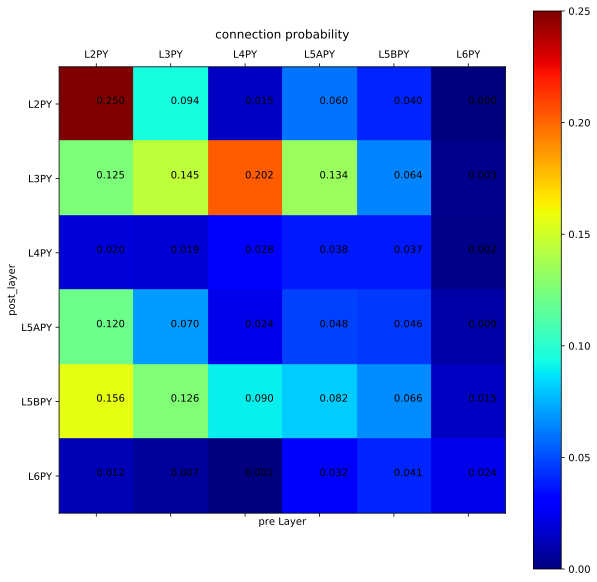

In [8]:
#normolized
SubRegion_external_connection_matrix_E2E=normalize_matrix_E2E(SubRegion_external_connection_matrix_E2E)
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2E[:,:,0])), fignum=1, cmap=plt.cm.jet)
for i in range (SubRegion_external_connection_matrix_E2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2E[i,j,0])
plt.title('connection probability')

scale_ls = range(6)  
index_ls=['L2PY', 'L3PY',  'L4PY',  'L5APY',  'L5BPY', 'L6PY']
_ = plt.xticks(scale_ls, index_ls)
_ = plt.yticks(scale_ls, index_ls)

plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.colorbar()
plt.savefig('SubRegion_external_connection_matrix_E2E_pcenter')

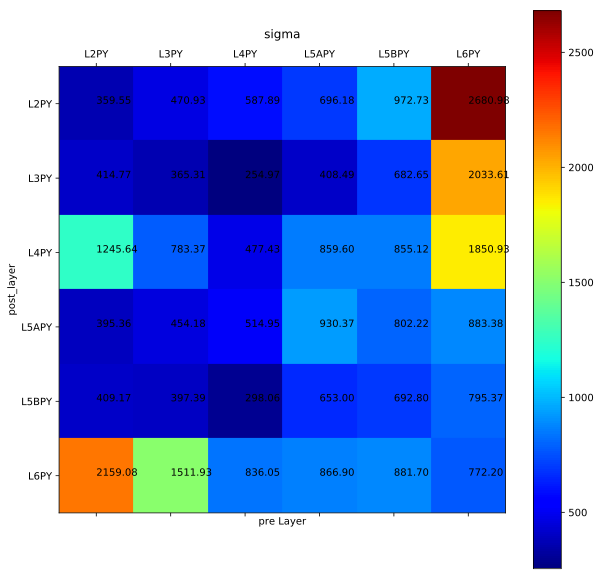

In [9]:
plt.figure(figsize=(10,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2E[:,:,1])), fignum=1, cmap=plt.cm.jet)
for i in range (SubRegion_external_connection_matrix_E2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2E.shape[1]):
        plt.text(i, j, '%.2f' %SubRegion_external_connection_matrix_E2E[i,j,1])
plt.title('sigma')

scale_ls = range(6)  
index_ls=['L2PY', 'L3PY',  'L4PY',  'L5APY',  'L5BPY', 'L6PY']
_ = plt.xticks(scale_ls, index_ls)
_ = plt.yticks(scale_ls, index_ls)

plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.colorbar()
plt.savefig('SubRegion_external_connection_matrix_E2E_sigma')

In [10]:
#E to I from Katzel 2013
S1_fitted_model_coefficients=pd.read_csv('180202_meso/data_extraction_from_experimental_papers/data/extracted_data/i_to_e_Katzel_10_fig4/S1_fitted_model_coefficients.dat').values
S1_normalized_original_matrix_cell_density_canceled_out=pd.read_csv('180202_meso/data_extraction_from_experimental_papers/data/extracted_data/i_to_e_Katzel_10_fig4/S1_normalized_original_matrix_cell_density_canceled_out.dat').values
S1_fitted_model_coefficients

array([[   0.        ,    5.55240698,  116.05676068],
       [   1.        ,    4.02767031,   81.14954554],
       [   2.        ,    5.28420221,  148.33935593],
       [   3.        ,    5.40610723,  142.78758871],
       [   4.        ,    5.13434884,  176.45714296]])

In [11]:
for j in I_index:
    if I_label[j]!='L1SBC' and I_label[j]!='L1ENGC' :
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L2PY'],1]=S1_fitted_model_coefficients[0,2]
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L3PY'],1]=S1_fitted_model_coefficients[0,2]
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L4PY'],1]=S1_fitted_model_coefficients[1,2]
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L5APY'],1]=S1_fitted_model_coefficients[2,2]
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L5BPY'],1]=S1_fitted_model_coefficients[3,2]
        SubRegion_external_connection_matrix_I2E[j,E_index_label['L6PY'],1]=S1_fitted_model_coefficients[4,2]

In [12]:
# L1 neuron SBC and ENGC from Lee and Jiang

ENGC_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L2_3I.dat').values[0]
ENGC_to_L2_3P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L2_3P.dat').values[0]
ENGC_to_L5P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L5P.dat').values[0]

SBC_to_L23_MAC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L23_MAC.dat').values[0]
ENGC_to_L23_MAC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_L23_MAC.dat').values[0]
#SBC_to_L23_P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L23_P.dat').values[0]
L23P_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L23P_to_SBC.dat').values[0][0]

SBC_to_L5P=[0.0, 0.0]
I_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/I_to_L2_3I.dat').values[0]
L2_3_Mac_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3_Mac_to_ENGC.dat').values[0][0]
L2_3_Mac_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3_Mac_to_SBC.dat').values[0][0]
L2_3I_to_L5P=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L2_3I_to_L5P.dat').values[0]
SBC_to_L2_3I=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_L2_3I.dat').values[0]

L5MC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5MC_to_SBC.dat').values[0][0]
L5MC_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5MC_to_ENGC.dat').values[0][0]

L5P_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/L5P_to_ENGC.dat').values[0][0]

SBC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/SBC_to_SBC.dat').values[0][0]

ENGC_to_ENGC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_ENGC.dat').values[0][0]
ENGC_to_SBC=pd.read_csv('JiangAndLee_Layer/data/extracted_data/L1_Jiang_13_Lee_14_figs/ENGC_to_SBC.dat').values[0][0]
L5MC_to_SBC =  L2_3_Mac_to_SBC*(0.279/0.468)
L5MC_to_ENGC =  L2_3_Mac_to_ENGC*(0.255/0.414)

In [13]:
#From L1 inhibitory neurons to E
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L2PY'], 0]=0.64947291
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L2PY'], 1]=213.490490572
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L3PY'], 0]=0.64947291
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L3PY'], 1]=213.490490572

SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L5APY'], 0]=0.2574876
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L5APY'], 1]=184.821601654
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L5BPY'], 0]=0.2574876
SubRegion_external_connection_matrix_I2E[I_index_label['L1I_ENGC'], E_index_label['L5BPY'], 1]=184.821601654

#From L2 inhibitory neurons to E
for l in ['L2I_PV', 'L2I_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]

#from L3 inhibitory neurons to E
for l in ['L3I_PV', 'L3I_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]

#from L4 inhibitory neurons to E
for l in ['L4I_PV', 'L4I_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[14, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[20, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[26, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[32, 2]

#from L5A inhibitory neurons to E
for l in ['L5AI_PV', 'L5AI_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[15, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[21, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[27, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[33, 2]

#from L5B inhibitory neurons to E
for l in ['L5BI_PV', 'L5BI_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[16, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[22, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[28, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[34, 2]

#from L6 inhibitory neurons to E
for l in ['L6I_PV', 'L6I_SST']:
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L4PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[17, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5APY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[23, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L5BPY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[29, 2]
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L6PY'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[35, 2]

#L23 VIP to L23 Py
for l in ['L2I_VIP', 'L3I_VIP']:    
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L2PY'], 0]=(0.279/0.468)*0.183
    SubRegion_external_connection_matrix_I2E[I_index_label[l], E_index_label['L3PY'], 0]=(0.279/0.468)*0.183

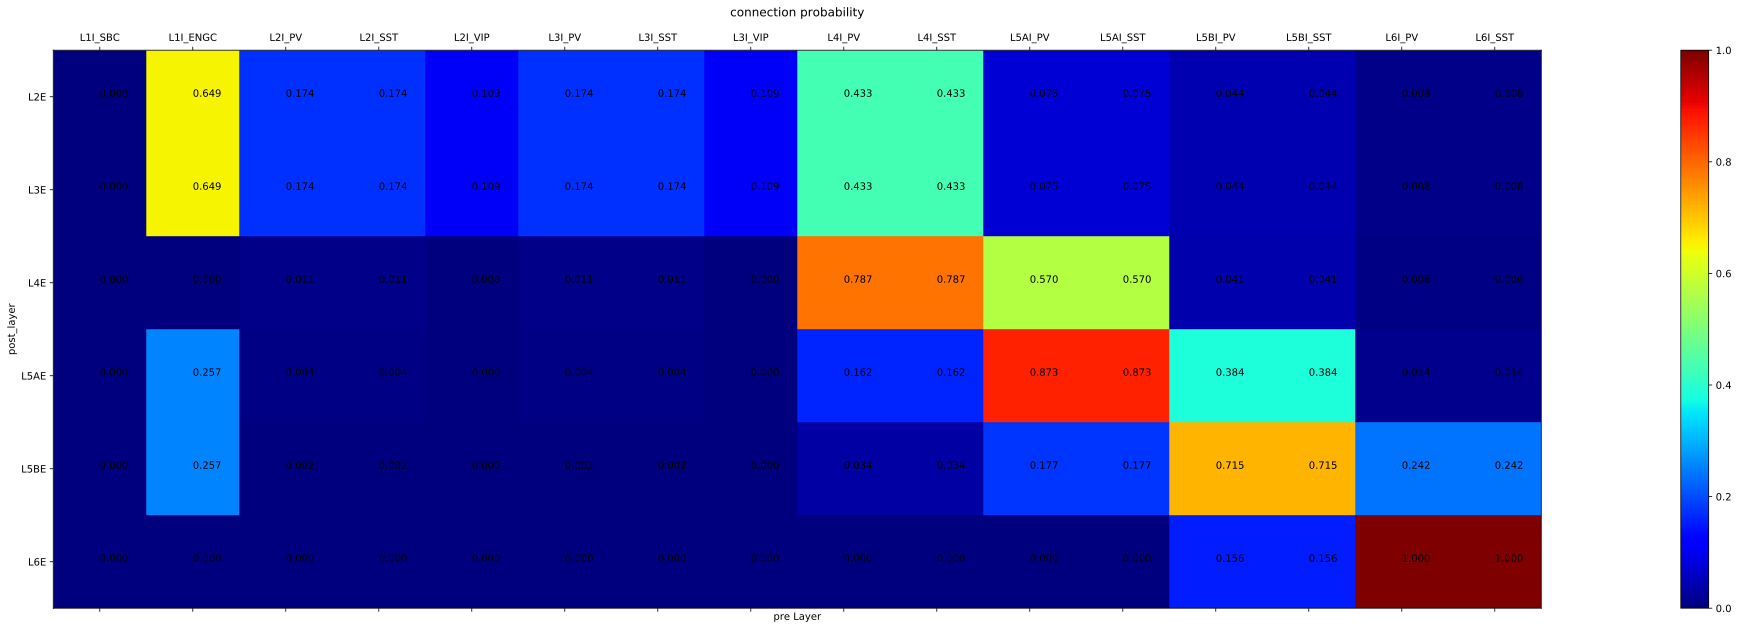

In [15]:
plt.figure(figsize=(50,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2E[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2E[i,j,0])
        
scale_ls_e = range(6)  
scale_ls_i = range(16) 
index_ls_e=['L2E','L3E',  'L4E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L4I_PV', 'L4I_SST',  'L5AI_PV', 'L5AI_SST',  'L5BI_PV', 'L5BI_SST'  , 'L6I_PV', 'L6I_SST']
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_I2E_pcenter')

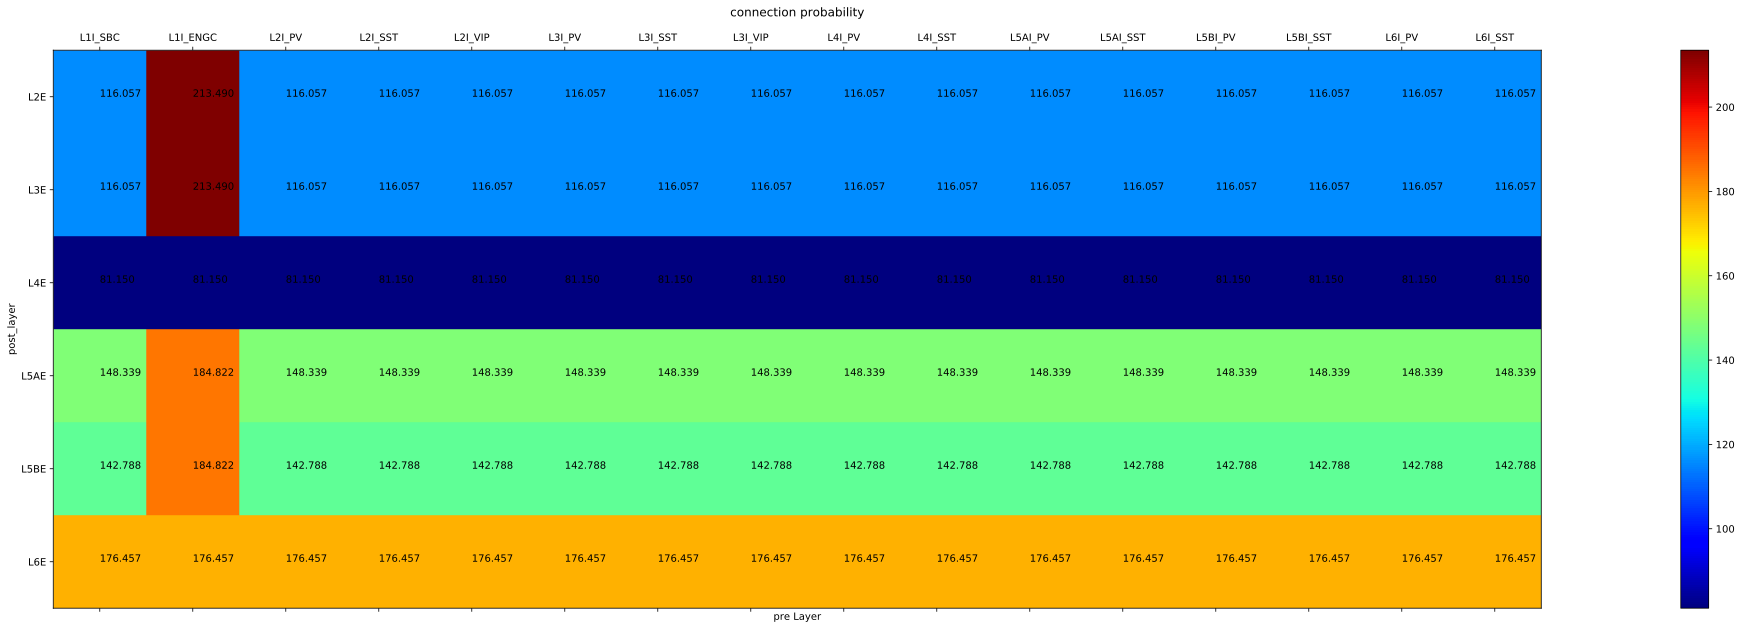

In [16]:
plt.figure(figsize=(50,10))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2E[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2E.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2E[i,j,1])
        
scale_ls_e = range(6)  
scale_ls_i = range(16) 
index_ls_e=['L2E','L3E',  'L4E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L4I_PV', 'L4I_SST',  'L5AI_PV', 'L5AI_SST',  'L5BI_PV', 'L5BI_SST'  , 'L6I_PV', 'L6I_SST']
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_I2E_sigma')

In [17]:
#E2I probability peak 

#From L2 inhibitory neurons to E
for l in ['L2I_PV', 'L2I_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 0, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 0, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 0, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 0, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 0, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 0, :]

for l in ['L3I_PV', 'L3I_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 1, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 1, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 1, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 1, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 1, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 1, :]
for l in ['L4I_PV', 'L4I_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 2, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 2, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 2, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 2, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 2, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 2, :]

for l in ['L5AI_PV', 'L5AI_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 3, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 3, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 3, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 3, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 3, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 3, :]

for l in ['L5BI_PV', 'L5BI_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 4, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 4, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 4, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 4, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 4, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 4, :]

for l in ['L6I_PV', 'L6I_SST']:
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[0, 5, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[1, 5, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L4PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[2, 5, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5APY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[3, 5, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L5BPY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[4, 5, :]
    SubRegion_external_connection_matrix_E2I[E_index_label['L6PY'], I_index_label[l], :]=SubRegion_external_connection_matrix_E2E[5, 5, :]
    
# L23 Py to L23 VIP 
for l in ['L2I_VIP', 'L3I_VIP']:    
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l] , 0]=(0.279/0.468)*0.2
    SubRegion_external_connection_matrix_E2I[E_index_label['L2PY'], I_index_label[l] , 1]=SubRegion_external_connection_matrix_E2E[0, 0, 1]
    
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l], 0]=(0.279/0.468)*0.2
    SubRegion_external_connection_matrix_E2I[E_index_label['L3PY'], I_index_label[l] , 1]=SubRegion_external_connection_matrix_E2E[1, 1, 1]
    


In [18]:
# I2I probability peak 
SubRegion_external_connection_matrix_I2I[I_index_label['L1I_SBC'], I_index_label['L1I_SBC'], 0]=SBC_to_SBC
SubRegion_external_connection_matrix_I2I[I_index_label['L1I_SBC'], I_index_label['L1I_SBC'], 1]=SBC_to_L23_MAC[1]

SubRegion_external_connection_matrix_I2I[I_index_label['L1I_ENGC'], I_index_label['L1I_SBC'], 0]=ENGC_to_SBC
SubRegion_external_connection_matrix_I2I[I_index_label['L1I_ENGC'], I_index_label['L1I_SBC'], 1]=S1_fitted_model_coefficients[0,2]

for l_pre in ['L2I_PV', 'L2I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]

for l_pre in ['L3I_PV', 'L3I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[7, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[13, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[19, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[25, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[31, 2]

for l_pre in ['L4I_PV', 'L4I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[8, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[14, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[14, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[20, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[20, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[26, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[26, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[32, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[32, 2]
    
for l_pre in ['L5AI_PV', 'L5AI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[9, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[15, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[15, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[21, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[21, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[27, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[27, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[33, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[33, 2]

for l_pre in ['L5BI_PV', 'L5BI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[10, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[16, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[16, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[22, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[22, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[28, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[28, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[34, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[34, 2]
    
for l_pre in ['L6I_PV', 'L6I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L2I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]

    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L3I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[11, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[17, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L4I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[17, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[23, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5AI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[23, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[29, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L5BI_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[29, 2]
    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_PV'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[35, 2]
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L6I_SST'], 0]=S1_normalized_original_matrix_cell_density_canceled_out[35, 2]
    
for l_pre in ['L2I_SST', 'L3I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_SBC'], 0]=L2_3_Mac_to_SBC
    #SubRegion_external_connection_matrix_I2I[i, 0 , 1]=L2_3_Mac_to_SBC
for l_pre in [ 'L5AI_SST', 'L5BI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_SBC'], 0]=L5MC_to_SBC
    #SubRegion_external_connection_matrix_I2I[i, 0 , 1]=L2_3_Mac_to_SBC[1]
for l_pre in ['L2I_SST', 'L3I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_ENGC'], 0]=L2_3_Mac_to_ENGC
    #SubRegion_external_connection_matrix_I2I[i, 1 , 1]=L2_3_Mac_to_ENGC[1]
for l_pre in [ 'L5AI_SST', 'L5BI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_ENGC'], 0]=L5MC_to_ENGC
    #SubRegion_external_connection_matrix_I2I[i, 1 , 1]=L2_3_Mac_to_ENGC[1]

for l_pre in ['L2I_VIP', 'L3I_VIP']: 
    for l_post in ['L2I_SST', 'L3I_SST']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=(0.279/0.468)*0.261

for l_pre in ['L2I_VIP', 'L3I_VIP']: 
    for l_post in ['L5AI_SST', 'L5BI_SST']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=(0.279/0.468)*0.31
        
for l_pre in ['L2I_SST', 'L3I_SST']: 
    for l_post in ['L2I_VIP', 'L3I_VIP']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=(0.279/0.468)*0.467

for l_pre in ['L5AI_SST', 'L5BI_SST']: 
    for l_post in ['L2I_VIP', 'L3I_VIP']:  
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=(0.279/0.468)*0.301
                

In [19]:
# I2I sigma
for l_pre in ['L2I_PV', 'L2I_SST', 'L2I_VIP']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[0,2]
    
for l_pre in ['L3I_PV', 'L3I_SST', 'L3I_VIP']:    
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[0,2]

for l_pre in ['L4I_PV', 'L4I_SST']: 
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[1,2]

for l_pre in ['L5AI_PV', 'L5AI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[2,2]
for l_pre in ['L5BI_PV', 'L5BI_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[3,2]
for l_pre in ['L6I_PV', 'L6I_SST']:
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre],2:,1]=S1_fitted_model_coefficients[4,2]

for i in ['L2I_SST', 'L3I_SST']:
    #SubRegion_external_connection_matrix_I2I[i, 0, 0]=L2_3_Mac_to_SBC
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_SBC'], 1]=S1_fitted_model_coefficients[0,2]
for i in [ 'L5AI_SST', 'L5BI_SST']:
    #SubRegion_external_connection_matrix_I2I[i, 0 , 0]=L5MC_to_SBC
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_SBC'], 1]=S1_fitted_model_coefficients[2,2]
for i in ['L2I_SST', 'L3I_SST']:
    #SubRegion_external_connection_matrix_I2I[i, 1 , 0]=L2_3_Mac_to_ENGC
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_ENGC'], 1]=S1_fitted_model_coefficients[0,2]
for i in [ 'L5AI_SST', 'L5BI_SST']:
    #SubRegion_external_connection_matrix_I2I[i, 1 , 0]=L5MC_to_ENGC
    SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label['L1I_ENGC'], 1]=S1_fitted_model_coefficients[2,2]

for l_pre in ['L2I_VIP', 'L3I_VIP']: 
    for l_post in ['L2I_SST', 'L3I_SST']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 1]=S1_fitted_model_coefficients[0,2]

for l_pre in ['L2I_VIP', 'L3I_VIP']: 
    for l_post in ['L5AI_SST', 'L5BI_SST']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 1]=S1_fitted_model_coefficients[0,2]
        
for l_pre in ['L2I_SST', 'L3I_SST']: 
    for l_post in ['L2I_VIP', 'L3I_VIP']: 
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 1]=S1_fitted_model_coefficients[0,2]

for l_pre in ['L5AI_SST', 'L5BI_SST']: 
    for l_post in ['L2I_VIP', 'L3I_VIP']:  
        SubRegion_external_connection_matrix_I2I[I_index_label[l_pre], I_index_label[l_post], 1]=S1_fitted_model_coefficients[2,2]
                
    

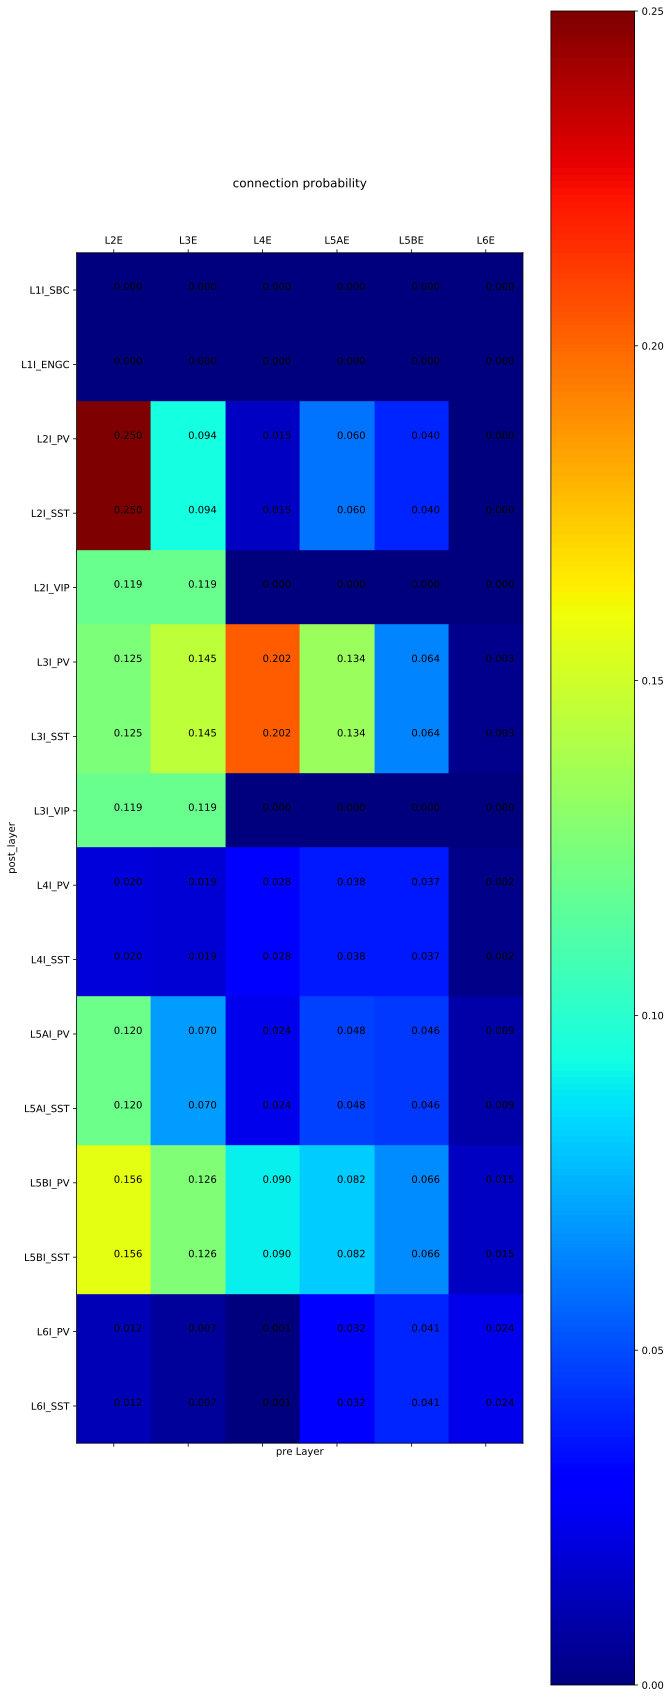

In [20]:
plt.figure(figsize=(10,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_E2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2I[i,j,0])
       
_ = plt.xticks(scale_ls_e, index_ls_e)
_ = plt.yticks(scale_ls_i, index_ls_i)         

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_E2I_pcenter')

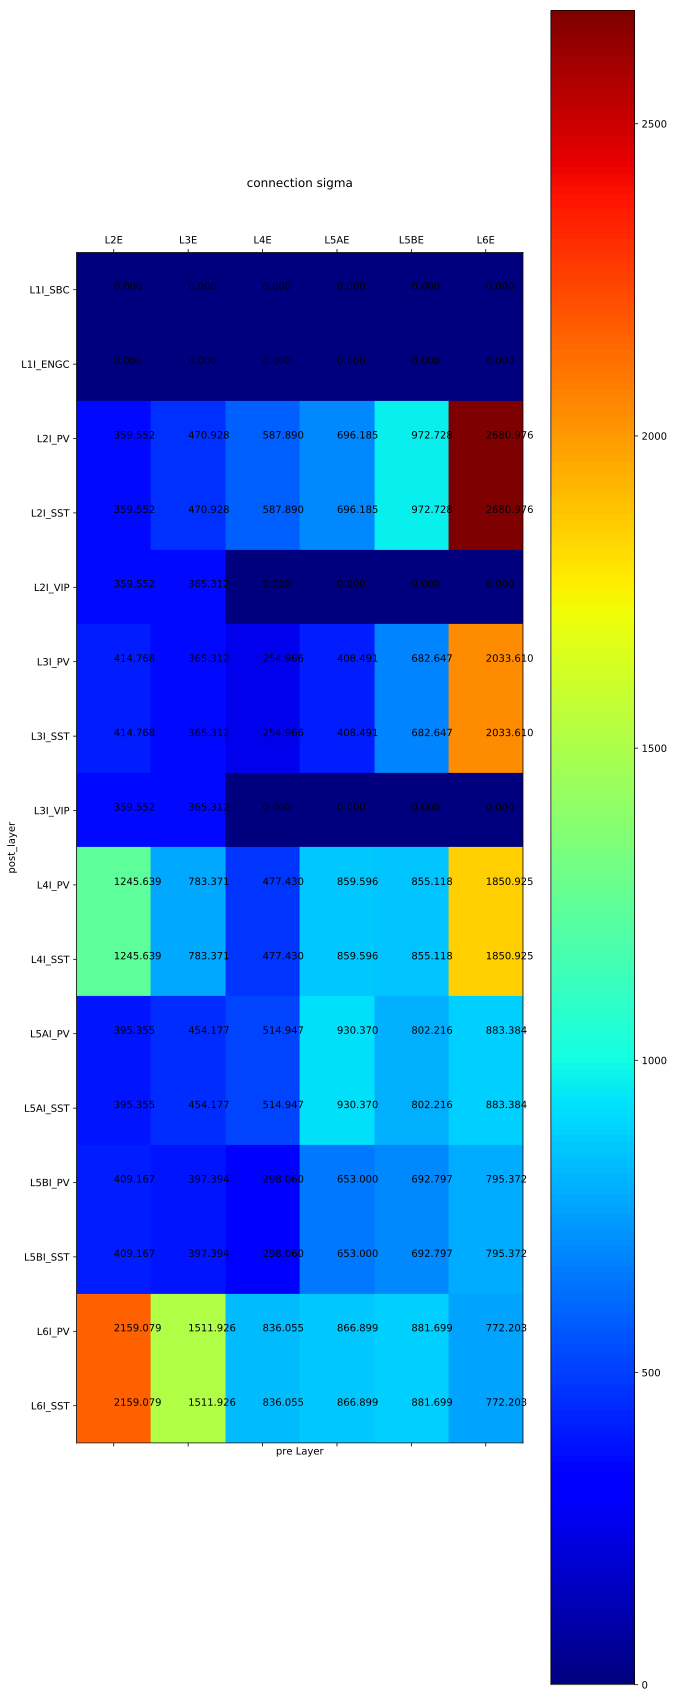

In [21]:
plt.figure(figsize=(10,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_E2I[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_E2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_E2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_E2I[i,j,1])
        
scale_ls_e = range(6)  
scale_ls_i = range(16) 
index_ls_e=['L2E','L3E',  'L4E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L4I_PV', 'L4I_SST',  'L5AI_PV', 'L5AI_SST',  'L5BI_PV', 'L5BI_SST'  , 'L6I_PV', 'L6I_SST']
_ = plt.xticks(scale_ls_e, index_ls_e)
_ = plt.yticks(scale_ls_i, index_ls_i)        

plt.title('connection sigma')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_E2I_sigma')

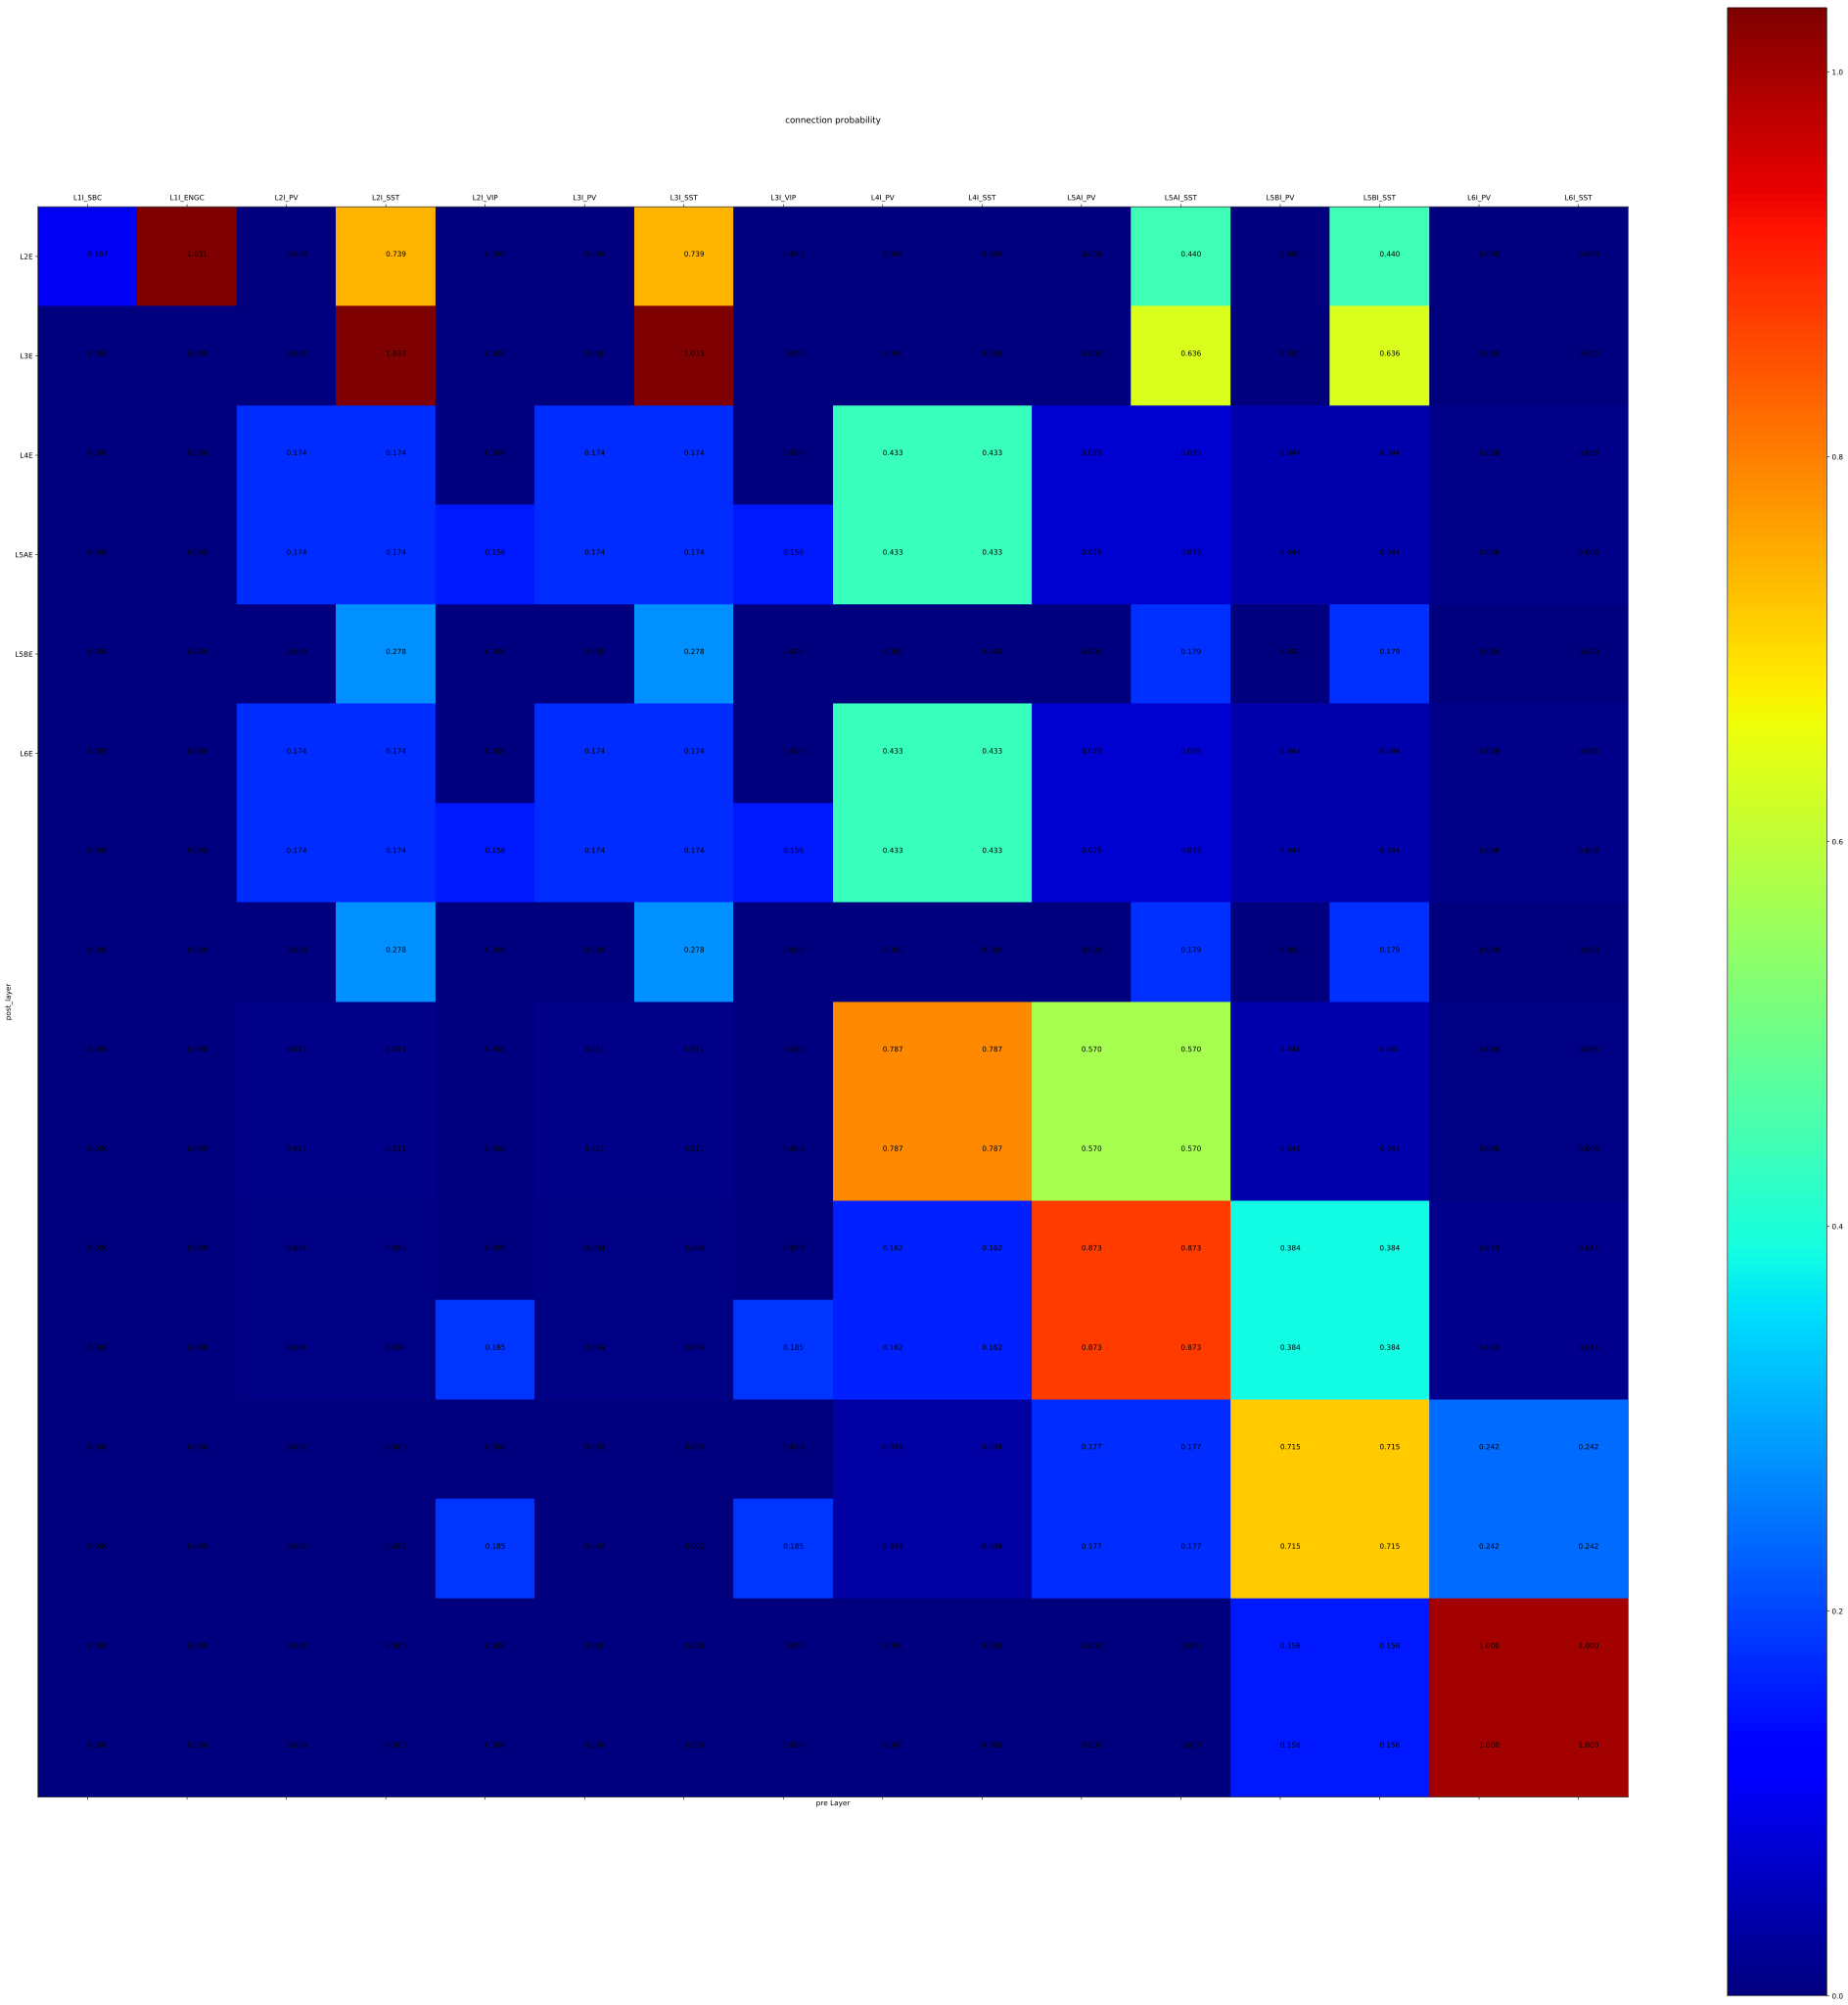

In [22]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2I[i,j,0])
        
scale_ls_e = range(6)  
scale_ls_i = range(16) 
index_ls_e=['L2E','L3E',  'L4E',  'L5AE',  'L5BE', 'L6E']
index_ls_i=['L1I_SBC', 'L1I_ENGC', 'L2I_PV', 'L2I_SST','L2I_VIP','L3I_PV', 'L3I_SST','L3I_VIP', 'L4I_PV', 'L4I_SST',  'L5AI_PV', 'L5AI_SST',  'L5BI_PV', 'L5BI_SST'  , 'L6I_PV', 'L6I_SST']
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i)        

plt.title('connection probability')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_I2I_pcenter.png', dpi=300)

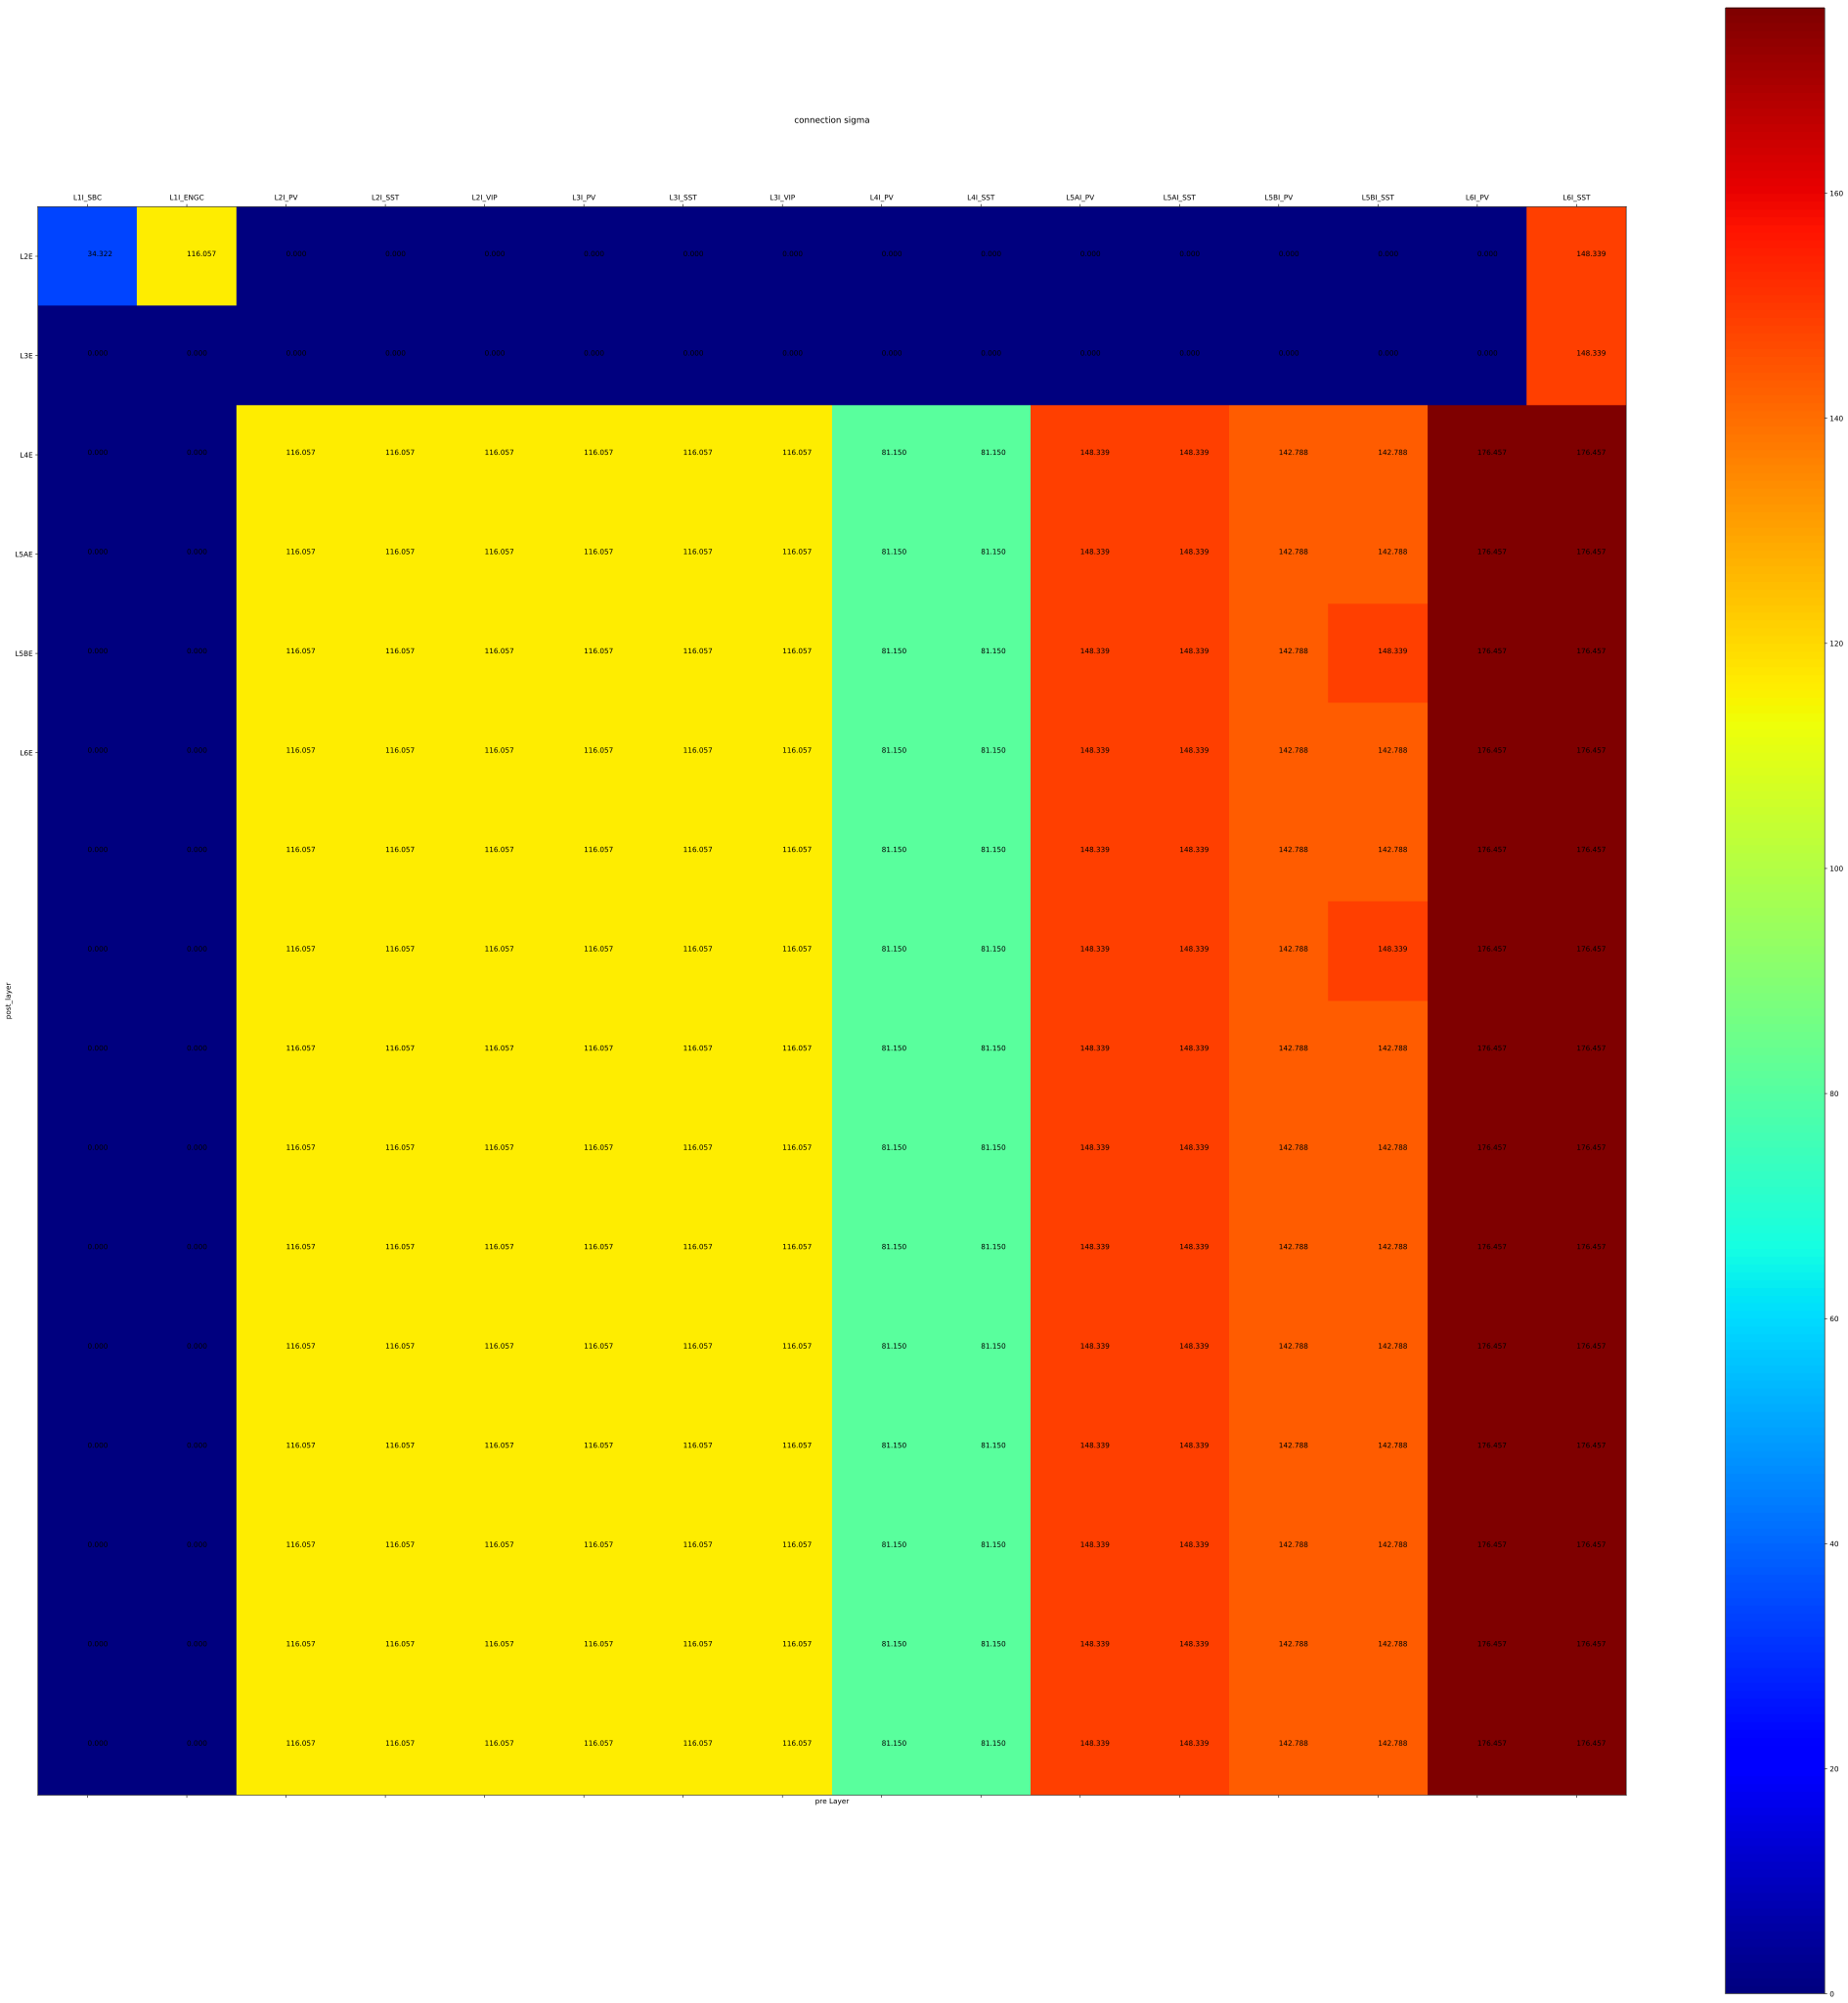

In [23]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_connection_matrix_I2I[:,:,1])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_connection_matrix_I2I.shape[0]):
    for j in range (SubRegion_external_connection_matrix_I2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_connection_matrix_I2I[i,j,1])
        
_ = plt.yticks(scale_ls_e, index_ls_e)
_ = plt.xticks(scale_ls_i, index_ls_i) 

plt.title('connection sigma')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_connection_matrix_I2I_sigma')

In [24]:
np.savez('SubRegion_external_connection_matrix',SubRegion_external_connection_matrix_E2E=SubRegion_external_connection_matrix_E2E, SubRegion_external_connection_matrix_I2E=SubRegion_external_connection_matrix_I2E, SubRegion_external_connection_matrix_E2I=SubRegion_external_connection_matrix_E2I, SubRegion_external_connection_matrix_I2I=SubRegion_external_connection_matrix_I2I)

In [25]:
#axis 2, index 0 is the weight and index 1 is the delay 

SubRegion_external_weight_delay_E2E=np.zeros((6,6,2))
SubRegion_external_weight_delay_I2E=np.zeros((16,6,2))
SubRegion_external_weight_delay_E2I=np.zeros((6,16,2))
SubRegion_external_weight_delay_I2I=np.zeros((16,16,2))

In [26]:
# fix all delay value as 1.5 ms
SubRegion_external_weight_delay_E2E[:, :, 1]=1.5
SubRegion_external_weight_delay_I2E[:, :, 1]=1.5
SubRegion_external_weight_delay_E2I[:, :, 1]=1.5
SubRegion_external_weight_delay_I2I[:, :, 1]=1.5

In [27]:
# From L1 SBC ENGC to other neurons' inputsun
SubRegion_external_weight_delay_E2E[:, :, 0] = -0.72
SubRegion_external_weight_delay_I2E[2:, :, 0]= - 1.0
SubRegion_external_weight_delay_I2E[I_index_label['L1I_SBC'], :, 0] = 0.
SubRegion_external_weight_delay_I2I[I_index_label['L1I_SBC'], :, 0]=-0.8

SubRegion_external_weight_delay_I2E[I_index_label['L1I_ENGC'], :, 0]=-1.
SubRegion_external_weight_delay_I2I[I_index_label['L1I_ENGC'], :, 0]=-1.

for l_pre in ['L2I_SST','L3I_SST','L4I_SST','L5AI_SST','L5BI_SST','L6I_SST']:
    SubRegion_external_weight_delay_I2I[I_index_label[l_pre], I_index_label['L1I_SBC'], 0]=-0.8
    SubRegion_external_weight_delay_I2I[I_index_label[l_pre], I_index_label['L1I_ENGC'], 0]=-0.8

#SubRegion_external_weight_delay_E2I[:, :, 0]=1.0
#SubRegion_external_weight_delay_I2I[:, :, 0]=1.0

In [28]:
for l_post in ['L2I_PV','L2I_VIP','L3I_PV','L3I_VIP', 'L4I_PV', 'L5AI_PV', 'L5BI_PV', 'L6I_PV']:
    SubRegion_external_weight_delay_E2I[:, I_index_label[l_post], 0]=0.82
for l_post in ['L2I_SST','L3I_SST','L4I_SST','L5AI_SST','L5BI_SST','L6I_SST']:
    SubRegion_external_weight_delay_E2I[:, I_index_label[l_post], 0]=0.39

In [29]:
#SubRegion_external_weight_delay_I2I[[2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], 0]=-1.12
#SubRegion_external_weight_delay_I2I[[3, 6, 9, 12, 15, 18], [2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19], 0]=-0.74

for l_pre in ['L2I_PV','L2I_VIP','L3I_PV','L3I_VIP', 'L4I_PV', 'L5AI_PV', 'L5BI_PV', 'L6I_PV']:
    for l_post in ['L2I_PV','L2I_VIP','L3I_PV','L3I_VIP', 'L4I_PV', 'L5AI_PV', 'L5BI_PV', 'L6I_PV']:
        SubRegion_external_weight_delay_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=-1.12

for i in ['L2I_SST','L3I_SST','L4I_SST','L5AI_SST','L5BI_SST','L6I_SST']:
    for j in ['L2I_PV','L2I_VIP','L3I_PV','L3I_VIP', 'L4I_PV', 'L5AI_PV', 'L5BI_PV', 'L6I_PV']:
        SubRegion_external_weight_delay_I2I[I_index_label[l_pre], I_index_label[l_post], 0]=-0.74

In [30]:
np.savez('SubRegion_external_weight_delay_matrix',SubRegion_external_weight_delay_E2E=SubRegion_external_weight_delay_E2E,SubRegion_external_weight_delay_I2E=SubRegion_external_weight_delay_I2E,SubRegion_external_weight_delay_E2I=SubRegion_external_weight_delay_E2I,SubRegion_external_weight_delay_I2I=SubRegion_external_weight_delay_I2I)

In [31]:
print (SubRegion_external_weight_delay_I2E[:, :, 0])

[[ 0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]]


In [32]:
scale_ls_e = range(6)  
scale_ls_i = range(16) 
index_ls_e=['L2PY', 'L3PY',  'L4PY',  'L5APY',  'L5BPY', 'L6PY']
index_ls_i=['L1SBC', 'L1ENGC', 'L2PV', 'L2SST','L2VIP','L3PV', 'L3SST','L3VIP', 'L4PV', 'L4SST', 'L5APV', 'L5ASST', 'L5BPV', 'L5BSST'  , 'L6PV', 'L6SST']

In [33]:
from collections import defaultdict
S1_internal_connection =defaultdict(dict)
for i in scale_ls_e:
    for j in scale_ls_e:
        S1_internal_connection[index_ls_e[i]][index_ls_e[j]]={'p_center': SubRegion_external_connection_matrix_E2E[i, j ,0],
                                                              'sigma': SubRegion_external_connection_matrix_E2E[i, j, 1], 
                                                              'weight': SubRegion_external_weight_delay_E2E[i, j, 0], 
                                                              'delay': SubRegion_external_weight_delay_E2E[i, j, 1],
                                                             'weight_distribution': 'lognormal'}

for i in scale_ls_e:
    for j in scale_ls_i:
        S1_internal_connection[index_ls_e[i]][index_ls_i[j]]={'p_center': SubRegion_external_connection_matrix_E2I[i, j, 0],
                                                         'sigma': SubRegion_external_connection_matrix_E2I[i, j, 1],
                                                         'weight': SubRegion_external_weight_delay_E2I[i, j, 0],
                                                         'delay': SubRegion_external_weight_delay_E2I[i, j ,1],
                                                             'weight_distribution': 'homogeneous'}
for i in scale_ls_i:
    for j in scale_ls_e:
        S1_internal_connection[index_ls_i[i]][index_ls_e[j]]={'p_center': SubRegion_external_connection_matrix_I2E[i, j ,0],
                                                         'sigma': SubRegion_external_connection_matrix_I2E[i, j ,1],
                                                         'weight': SubRegion_external_weight_delay_I2E[i, j, 0],
                                                         'delay': SubRegion_external_weight_delay_I2E[i, j, 1],
                                                             'weight_distribution': 'homogeneous'}
        
for i in scale_ls_i:
    for j in scale_ls_i:
        S1_internal_connection[index_ls_i[i]][index_ls_i[j]]={'p_center': SubRegion_external_connection_matrix_I2I[i, j, 0],
                                                         'sigma': SubRegion_external_connection_matrix_I2I[i, j, 1],
                                                         'weight': SubRegion_external_weight_delay_I2I[i, j, 0],
                                                         'delay': SubRegion_external_weight_delay_I2I[i, j, 1],
                                                             'weight_distribution': 'homogeneous'}
        
print (S1_internal_connection)   


defaultdict(<class 'dict'>, {'L2PY': {'L2PY': {'p_center': 0.25, 'sigma': 359.55167104999998, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L3PY': {'p_center': 0.1254141974207936, 'sigma': 414.76803556199997, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L4PY': {'p_center': 0.02008317605003776, 'sigma': 1245.63929745, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L5APY': {'p_center': 0.12049629122445275, 'sigma': 395.355080063, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L5BPY': {'p_center': 0.15637767536797673, 'sigma': 409.16700473999998, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L6PY': {'p_center': 0.011893759804969213, 'sigma': 2159.07851798, 'weight': -0.71999999999999997, 'delay': 1.5, 'weight_distribution': 'lognormal'}, 'L1SBC': {'p_center': 0.0, 'sigma': 0.0, 'weight': 0.0, 'delay': 1

In [34]:
import pickle
with open('S1_internal_connection.pickle', 'wb') as handle:
    pickle.dump(S1_internal_connection, handle, protocol=pickle.HIGHEST_PROTOCOL)

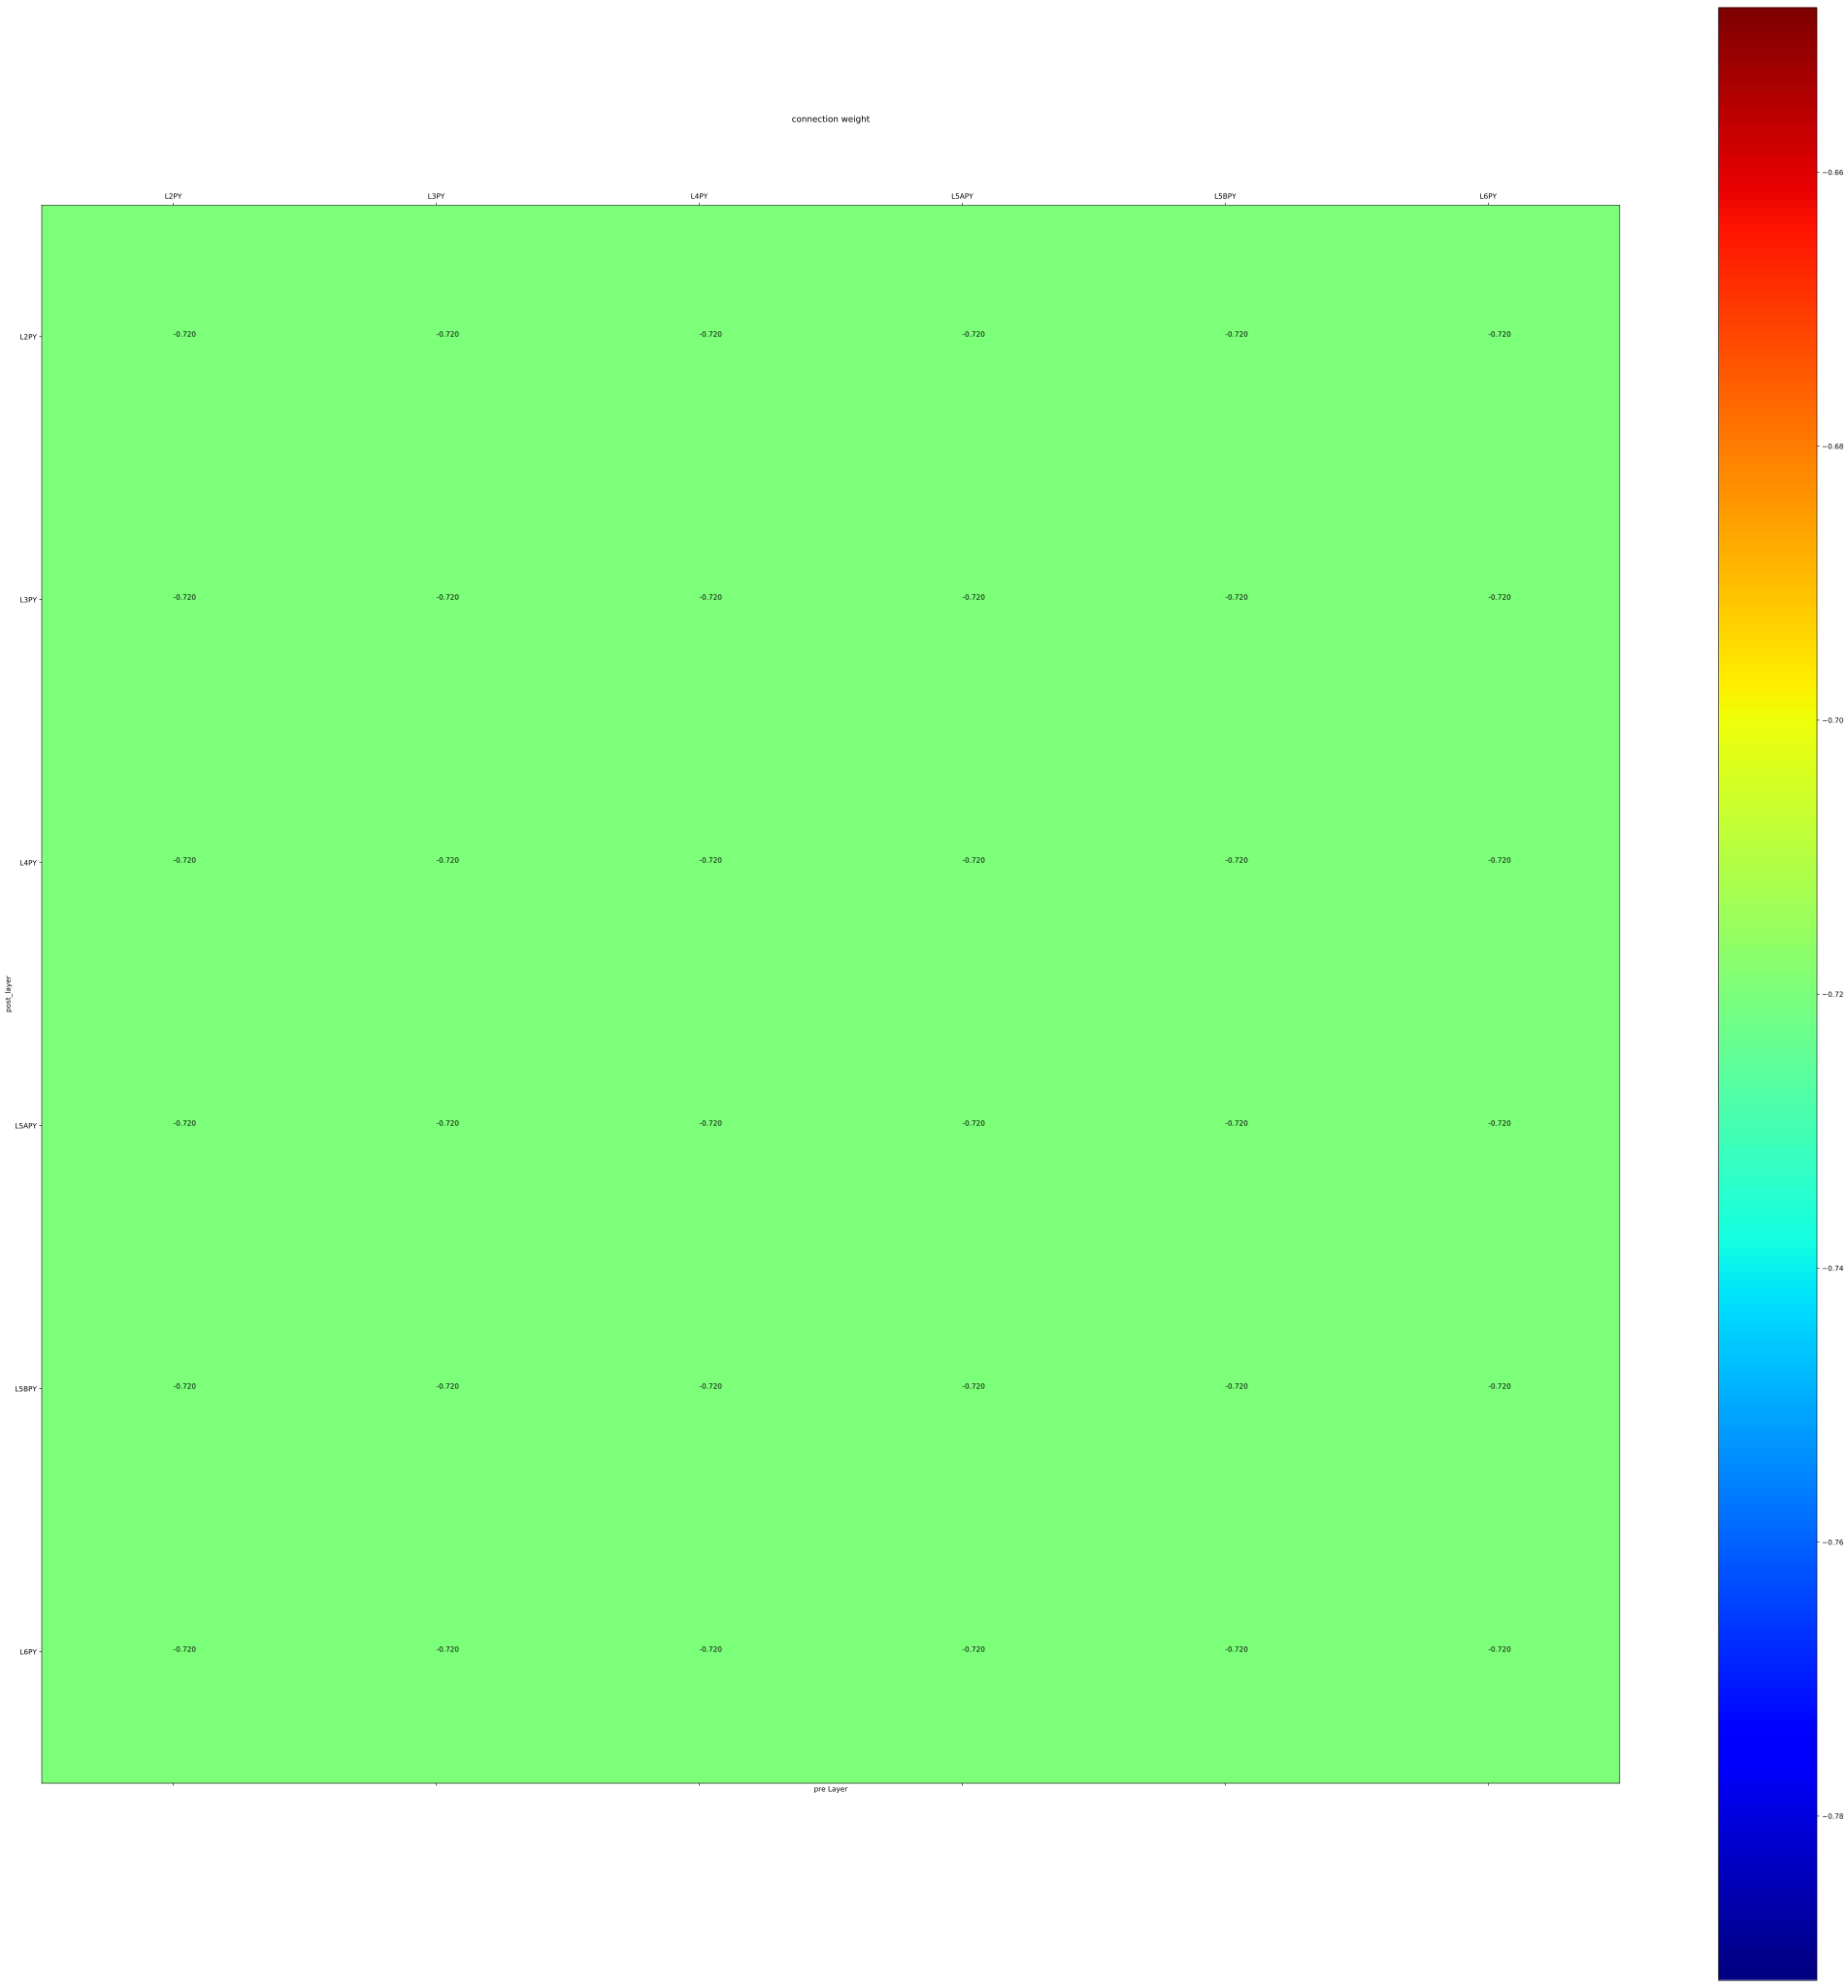

In [40]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_weight_delay_E2E[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_weight_delay_E2E.shape[0]):
    for j in range (SubRegion_external_weight_delay_E2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_weight_delay_E2E[i,j,0])
        
_ = plt.xticks(scale_ls_e, index_ls_e)
_ = plt.yticks(scale_ls_e, index_ls_e)        

plt.title('connection weight')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_weight_delay_E2E_weight.png', dpi=300)

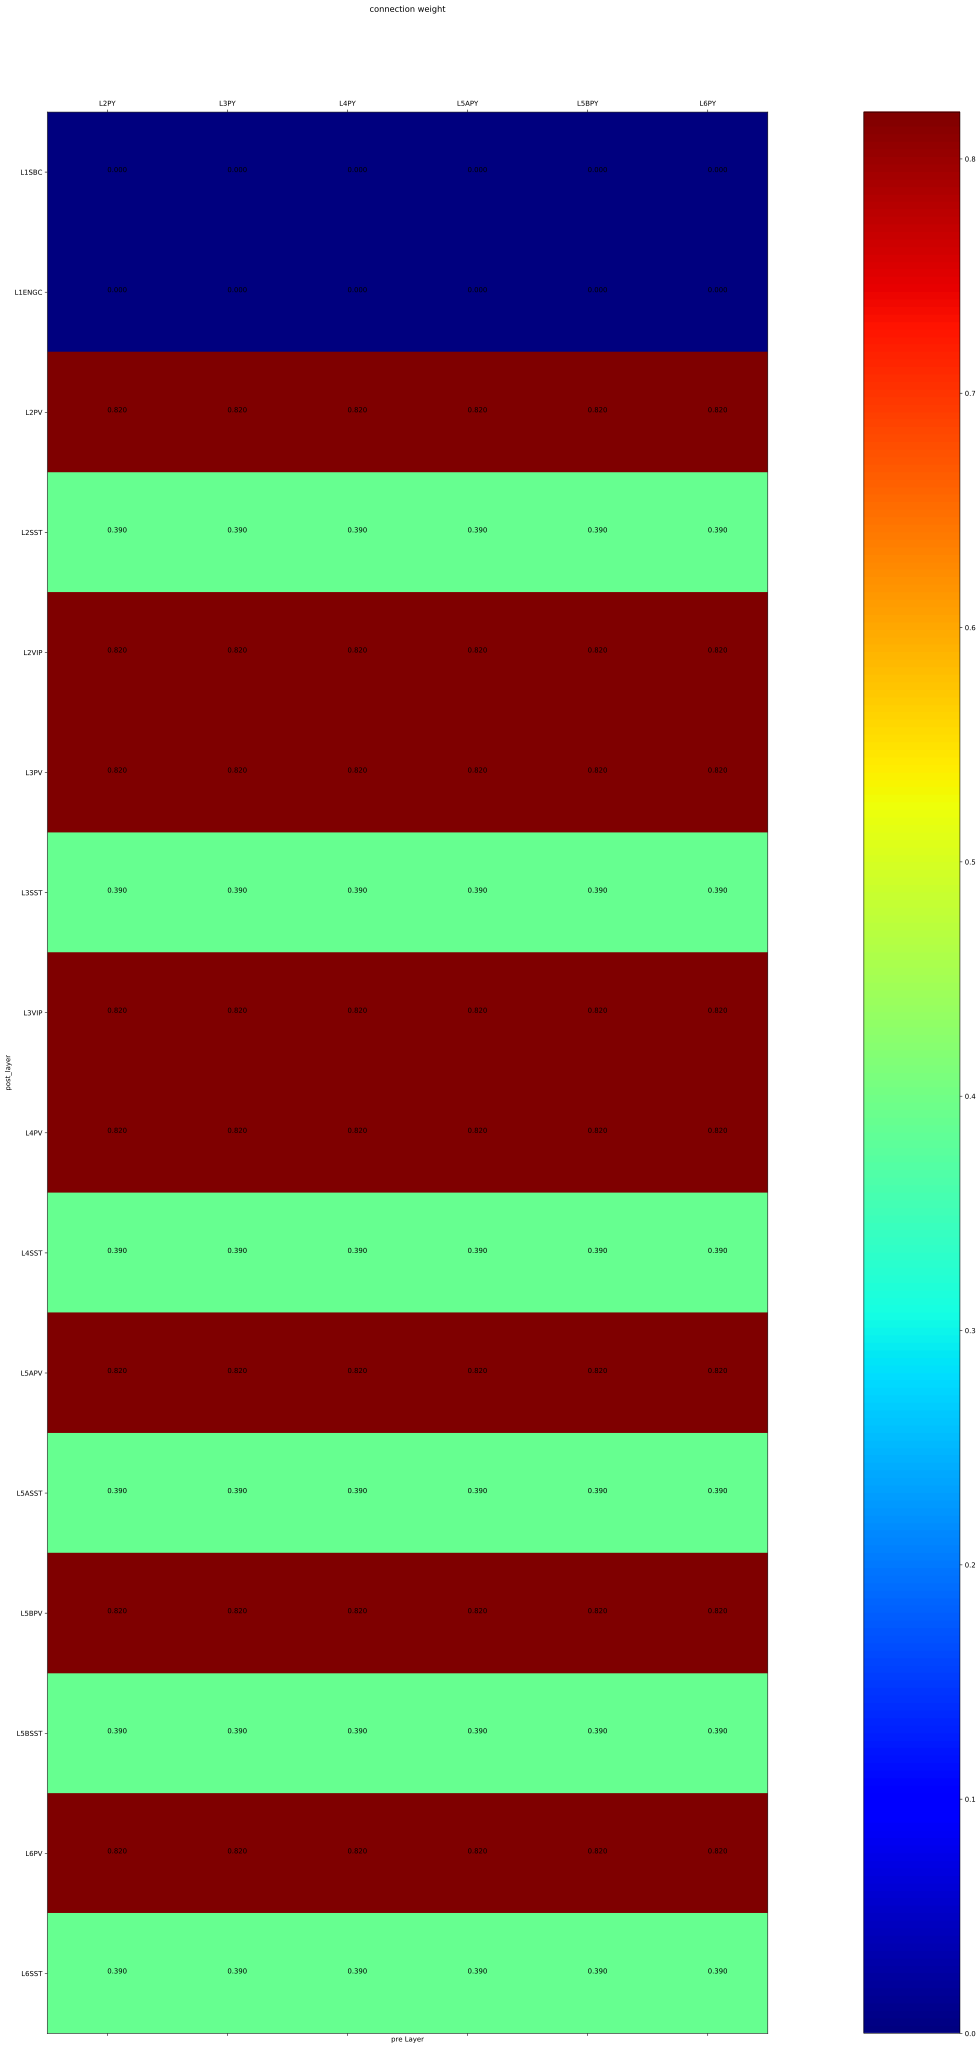

In [37]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_weight_delay_E2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_weight_delay_E2I.shape[0]):
    for j in range (SubRegion_external_weight_delay_E2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_weight_delay_E2I[i,j,0])
        
_ = plt.xticks(scale_ls_e, index_ls_e)
_ = plt.yticks(scale_ls_i, index_ls_i)        

plt.title('connection weight')
plt.xlabel('pre Layer')
plt.ylabel('post_layer')
plt.savefig('SubRegion_external_weight_delay_E2I_weight.png', dpi=300)

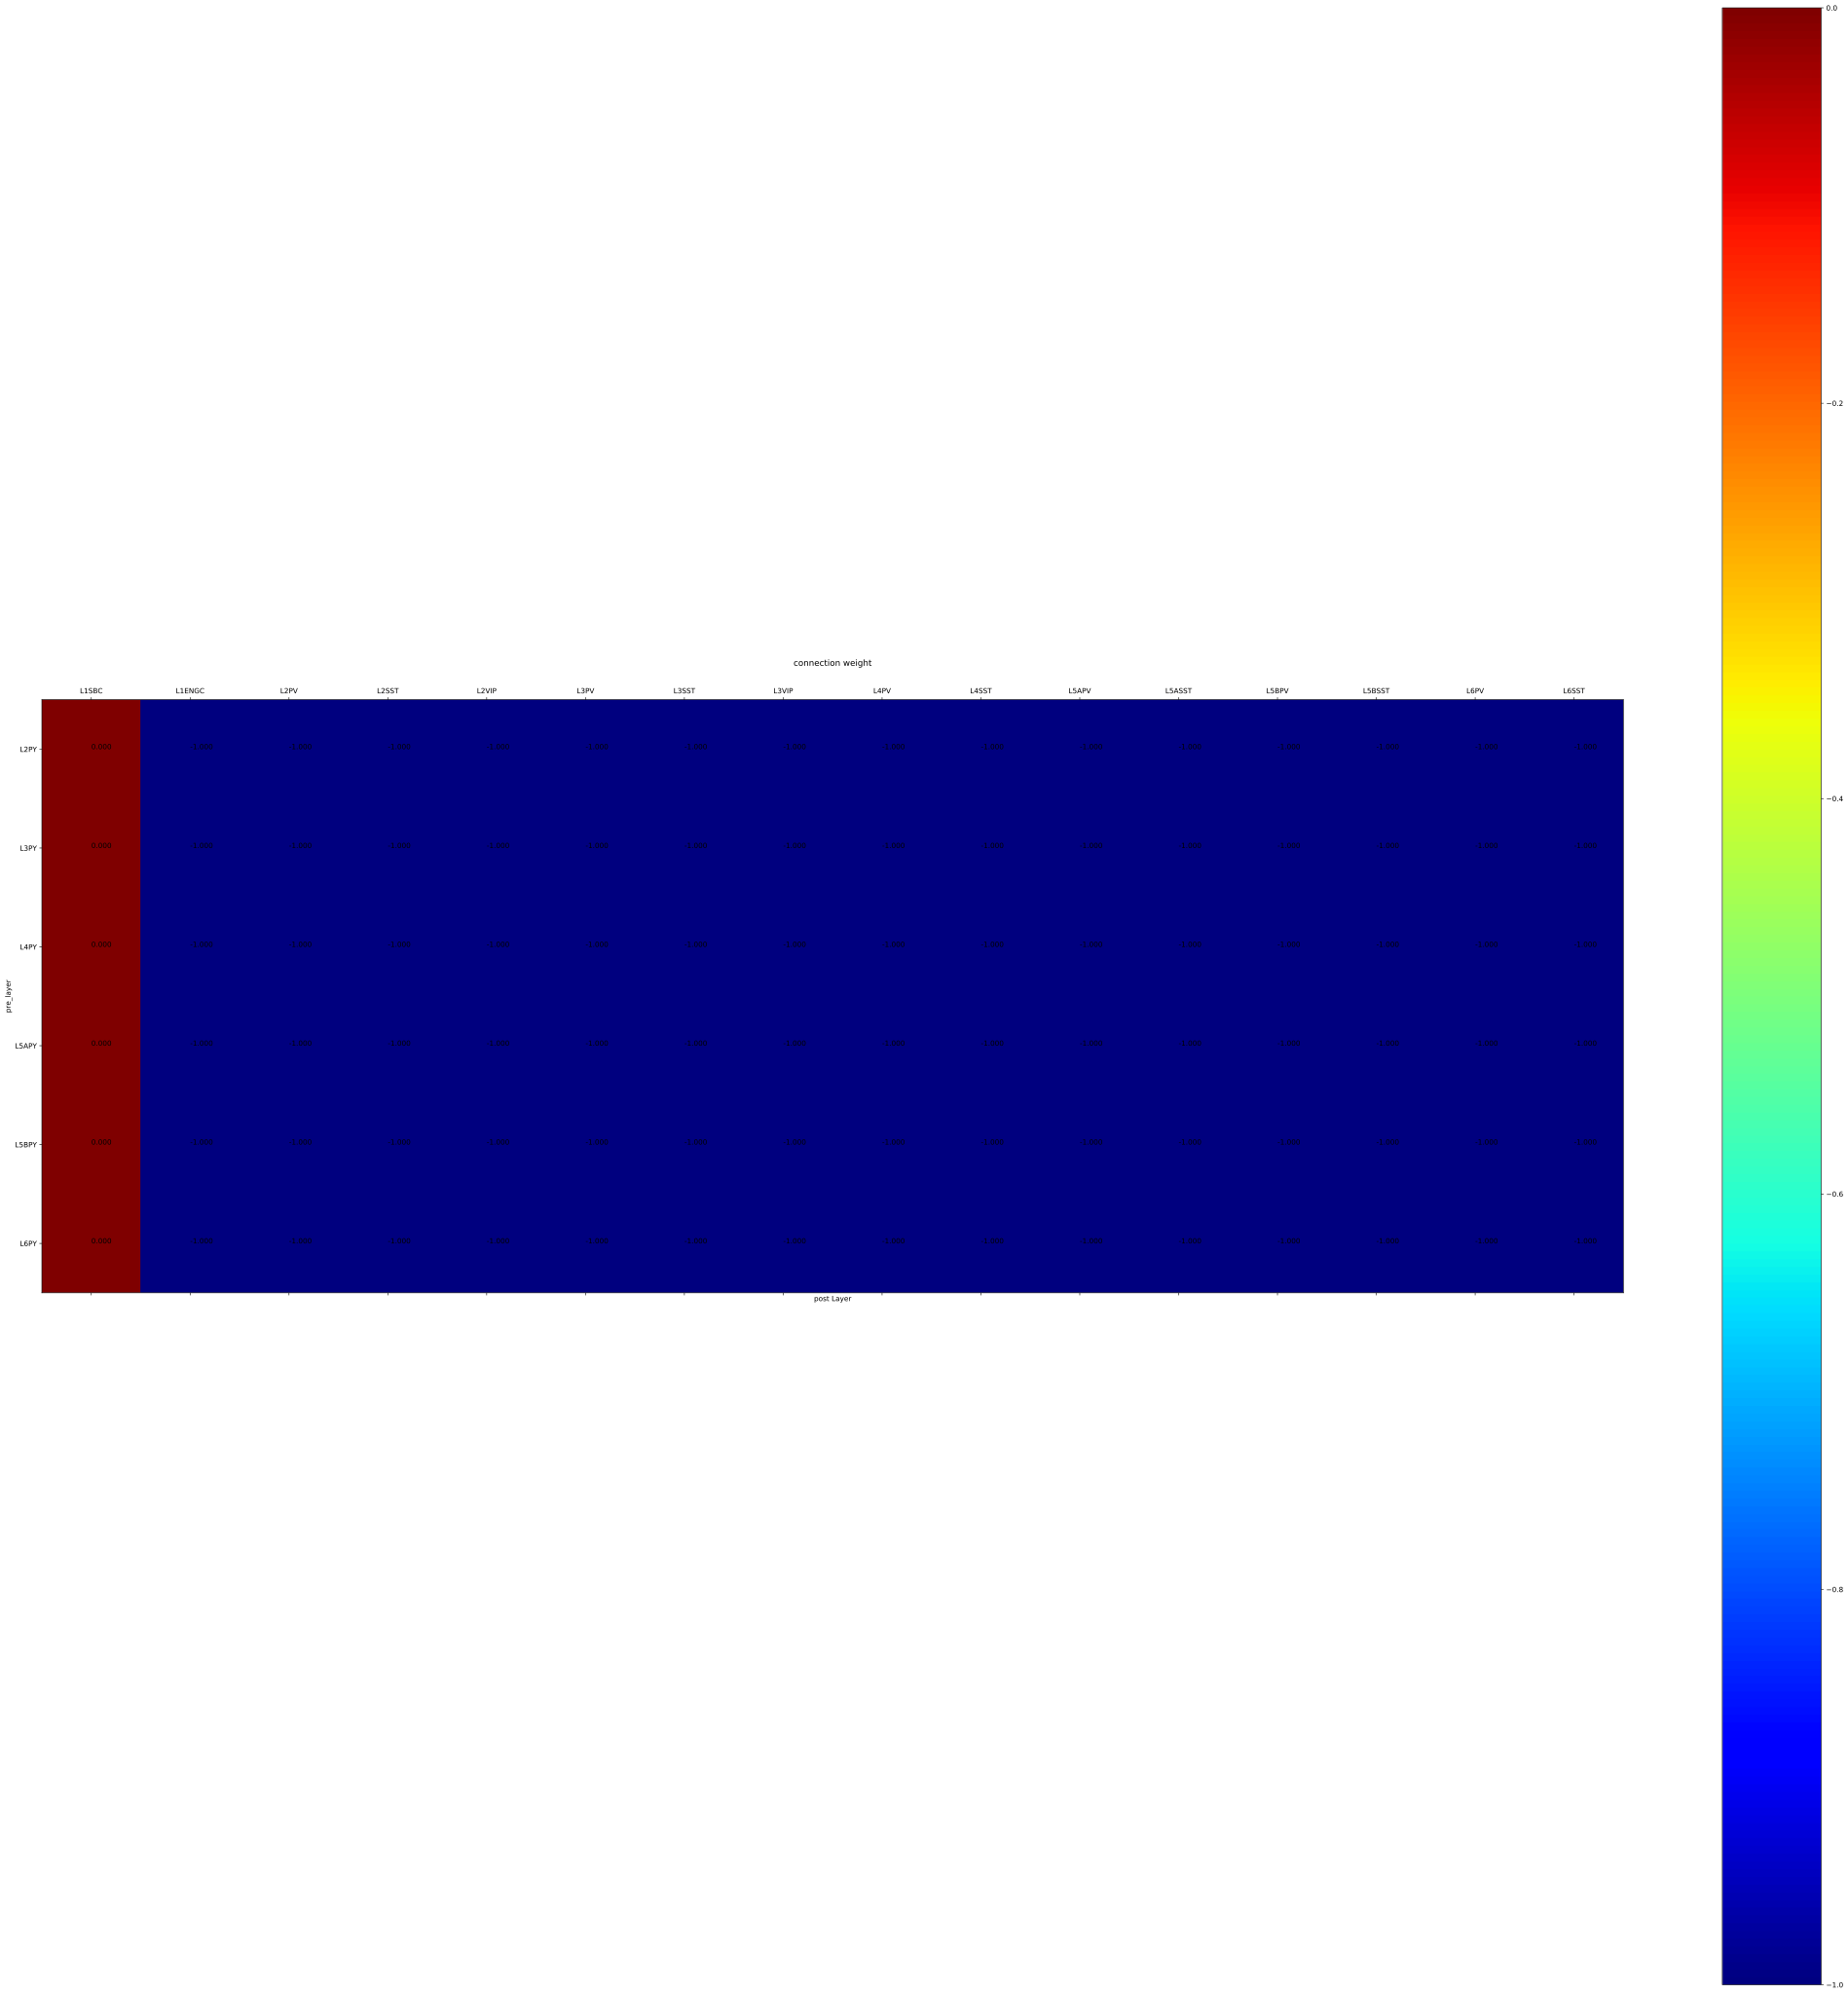

In [38]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_weight_delay_I2E[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_weight_delay_I2E.shape[0]):
    for j in range (SubRegion_external_weight_delay_I2E.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_weight_delay_I2E[i,j,0])
        
_ = plt.xticks(scale_ls_i, index_ls_i)
_ = plt.yticks(scale_ls_e, index_ls_e)        

plt.title('connection weight')
plt.xlabel('post Layer')
plt.ylabel('pre_layer')
plt.savefig('SubRegion_external_weight_delay_I2E_weight.png', dpi=300)

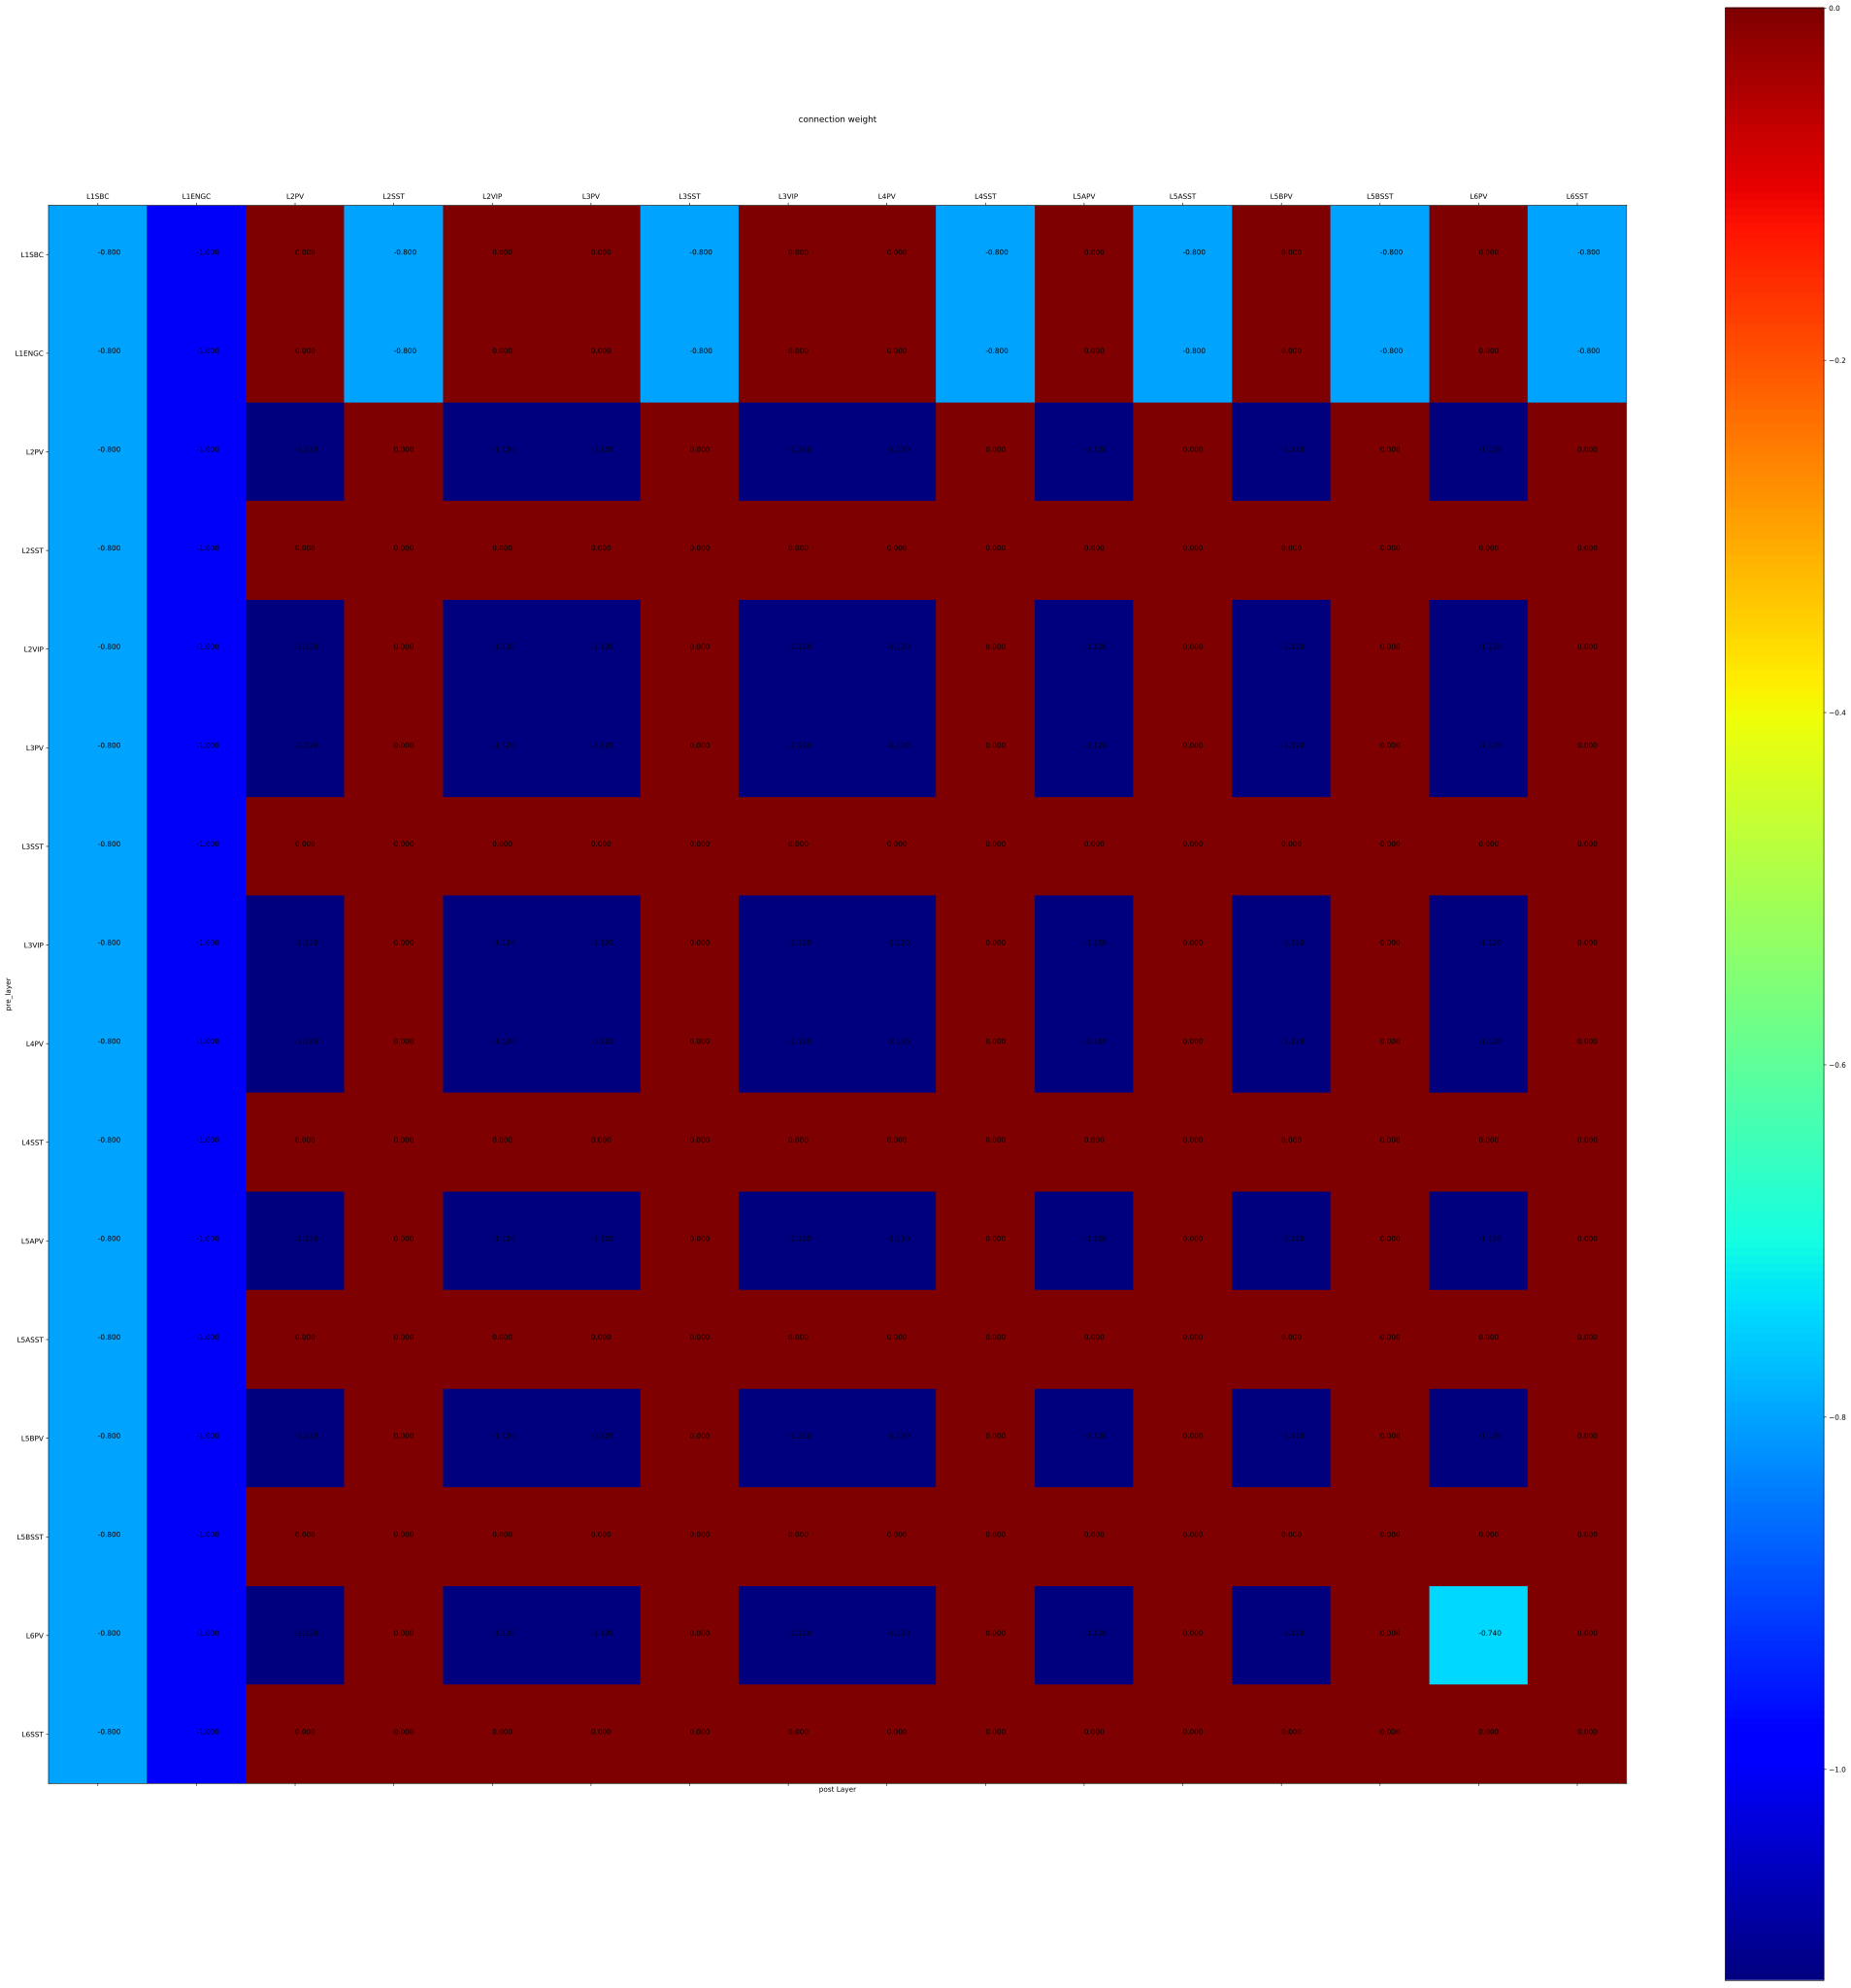

In [39]:
plt.figure(figsize=(50,50))
plt.matshow(np.transpose(np.squeeze(SubRegion_external_weight_delay_I2I[:,:,0])), fignum=1, cmap=plt.cm.jet)

plt.colorbar()
for i in range (SubRegion_external_weight_delay_I2I.shape[0]):
    for j in range (SubRegion_external_weight_delay_I2I.shape[1]):
        plt.text(i, j, '%.3f' %SubRegion_external_weight_delay_I2I[i,j,0])
        
_ = plt.xticks(scale_ls_i, index_ls_i)
_ = plt.yticks(scale_ls_i, index_ls_i)        

plt.title('connection weight')
plt.xlabel('post Layer')
plt.ylabel('pre_layer')
plt.savefig('SubRegion_external_weight_delay_I2I_weight.png', dpi=300)